# Store Sales -- Time Series Forecasting

**Overview:**
Favorita, a large Ecuadorian-based grocery retailer wants to predict the future prices of each product family sold at the grocery store.

### 1.0 Business Understanding:

**1.1 Objective:**
This projects aims to build an effective model to predict the unit price of the items in the store for different products.In this project, we will analyze past sales data from Corporation Favorita. Also, we will analyze other occurrences that may have impact on the sales performance of the retail store chains.

**1.2 Feature Explanation:**

- store_nbr identifies the store at which the products are sold.

- family identifies the type of product sold.

- sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

- onpromotion gives the total number of items in a product family that were being promoted at a store at a given date


**1.3 Hypothesis:**

**Null Hypothesis (H0)**:
"There is no significant relationship between store sales and when products are on promotion."

**Alternative Hypothesis (Ha)**:
"There is a significant relationship between store sales and when products are on promotion."

**1.4 Research Questions:**

1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year?

3. Did the earthquake impact sales?

4. Are certain groups of stores selling more products? (Cluster, city, state, type)

5. Are sales affected by promotions, oil prices and holidays?

6. What analysis can we get from the date and its extractable features?

### 2.0 Data Understanding
   **2.1 Importation:**
   Import necessary libraries and modules for data analysis and machine learning.

In [202]:
# Data manipulation packages
import numpy as np
import pandas as pd

#Data Visualization packages
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
plt.style.use("fivethirtyeight")

# Machine learning Packages
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import datetime
from datetime import datetime
from scipy import interpolate
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
from scipy import interpolate
import os, pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import kpss
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats import t, ttest_ind, chi2_contingency
from statsmodels.tsa.stattools import adfuller
#from pmdarima.arima import auto_arima
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy.stats import boxcox



# Evaluating the models 
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")

 **2.1 Loading of datasets:**
Loading all the datasets required

In [134]:
# loading the datasets and parsing the date column
train = pd.read_csv(r'/Users/grakashi/Downloads/train.csv',parse_dates =['date'])
test_data = pd.read_csv("test.csv")
stores = pd.read_csv("table3.csv")
holidays = pd.read_csv("table2.csv",parse_dates =['date'])
oil = pd.read_csv("table1.csv",parse_dates =['date'])
transactions = pd.read_csv("transactions.csv",parse_dates =['date'])

 **2.2 Exploratory Data Analysis:**
   - Explore data (info, duplicated, null values, describe)

#### Train Data

In [135]:
# Checking the head and tail of the train data
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [136]:
# Checking the size of the train dataset
train.shape

(3000888, 6)

In [137]:
# Checking the basic info of the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [138]:
# Checking for null values in the train data
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [139]:
# Checking for missing data in the train dataset
train.duplicated().sum()

0

In [140]:
# Checking the basic statistics of the train data
train.describe(include="all").transpose()

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id,3000888.0,NaN,NaN,NaN,NaT,NaT,1500443.5,866281.891642,0.0,750221.75,1500443.5,2250665.25,3000887.0
date,3000888,1684,2013-01-01 00:00:00,1782,2013-01-01,2017-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_nbr,3000888.0,NaN,NaN,NaN,NaT,NaT,27.5,15.585787,1.0,14.0,27.5,41.0,54.0
family,3000888,33,AUTOMOTIVE,90936,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales,3000888.0,NaN,NaN,NaN,NaT,NaT,357.775749,1101.997721,0.0,0.0,11.0,195.84725,124717.0
onpromotion,3000888.0,NaN,NaN,NaN,NaT,NaT,2.60277,12.218882,0.0,0.0,0.0,0.0,741.0


There are 33 different categories of grocery products. Automotive family has the most number of products.<br />Also, there are 54 stores in the data

#### Test Data

In [141]:
# Checking the head and tail of the test data
test_data

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [142]:
# Checking the sahpe of the test dataset
test_data.shape

(28512, 5)

In [143]:
# Checking the basic info of the test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [144]:
# Checking for duplicates in the test data
test_data.duplicated().sum()

0

#### Stores Data

In [145]:
# Checking the head  of the stores data
stores.head()

,Unnamed: 0,store_nbr,city,state,type,cluster
0,0,1,Quito,Pichincha,D,13
1,1,2,Quito,Pichincha,D,13
2,2,3,Quito,Pichincha,D,8
3,3,4,Quito,Pichincha,D,9
4,4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [146]:
# Checking the shape of the stores data
stores.shape

(54, 6)

In [147]:
# removing unwanted columns from the stores data
stores = stores.drop(['Unnamed: 0'],axis=1)

In [148]:
# Checking the basic info of the stores data
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [149]:
# Checking for dupliated entries in the stores data
stores.duplicated().sum()

0

In [150]:
# Checking for unique values in the stores data

stores.nunique()

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

Stores are located at 22 different Cities in 16 States. There are 5 different types of stores.There are 17 similar stores located in these cities.

#### Holiday Data

In [151]:
# Checking the head of the holidays data
holidays.head()

,Unnamed: 0,date,type,locale,locale_name,description,transferred
0,0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [152]:
# removing unwanted columns from the holiday data
holidays = holidays.drop(['Unnamed: 0'],axis=1)

In [153]:
# Checking the basic info of the holidays data
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [154]:
# Checking for duplicated values in the data
holidays.duplicated().sum()

0

There are no duplicated values in the holidays dataset

In [155]:
# Checking the number of unique values in the holidays dataset
holidays.nunique()

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

There are 6 types of holidays and 2 forms of holidays transfers

In [156]:
# Checking the different types of holidays
list(holidays.type.unique())

['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event']

In [157]:
# checking for missing values in the holidays data
holidays.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

#### Oil Data

In [158]:
# Checking the head of the oil data
oil

,Unnamed: 0,date,dcoilwtico
0,0,2013-01-01,NaN
1,1,2013-01-02,93.139999
2,2,2013-01-03,92.970001
3,3,2013-01-04,93.120003
4,4,2013-01-07,93.199997
...,...,...,...
1213,1213,2017-08-25,47.650002
1214,1214,2017-08-28,46.400002
1215,1215,2017-08-29,46.459999
1216,1216,2017-08-30,45.959999


In [159]:
# removing unwanted columns from the holiday data
oil = oil.drop(['Unnamed: 0'],axis=1)

In [160]:
# Checking the shape of the oil data
oil.shape

(1218, 2)

In [161]:
# Checking the basic info of the oil data
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [162]:
# Checking the null values
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

Insight:
- There are 43 null values in the oil data. Since this a crude oil price,, there is no possibilty that crude oil price will 0. Hence, we will compute it with either the mean, minimum value or 50th percentile

In [163]:
# Cecking for duplicated values in the oil data
oil.duplicated().sum()

0

In [164]:
# Checking the basic statistics of the oil data
oil.describe(exclude="object").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
date,1218,1218,2013-01-01,1,2013-01-01,2017-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dcoilwtico,1175.0,NaN,NaT,NaN,NaT,NaT,67.714366,25.630476,26.190001,46.405001,53.189999,95.66,110.620003


#### Transactions Data

In [165]:
# Checking the head of the transactions data
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [166]:
# Checking the shape of the transactions data
transactions.shape

(83488, 3)

In [167]:
# Checking the basic info of the transactions data
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [168]:
# Checking for duplicated values in the transactions data
transactions.duplicated().sum()

0

Checking the date ranges of all the datasets

In [169]:
# checking the date range of the data
print(f"Date range  of oil data is from:{oil['date'].min()} to {oil['date'].max()}")
# checking the date range of the data
print(f"Date range of holiday data is from:{holidays['date'].min()} to {oil['date'].max()}")
# checking the date range of the data
print(f"Date range of transactions data is from:{transactions['date'].min()} to {oil['date'].max()}")
# checking the date range of the data
print(f"Date range of train data is from:{train['date'].min()} to {oil['date'].max()}")

Date range  of oil data is from:2013-01-01 00:00:00 to 2017-08-31 00:00:00
Date range of holiday data is from:2012-03-02 00:00:00 to 2017-08-31 00:00:00
Date range of transactions data is from:2013-01-01 00:00:00 to 2017-08-31 00:00:00
Date range of train data is from:2013-01-01 00:00:00 to 2017-08-31 00:00:00


**2.3.1 Univariate Analysis:**
     Explore individual variables for insights.

##### Exploring Sales Over Time -Train Data

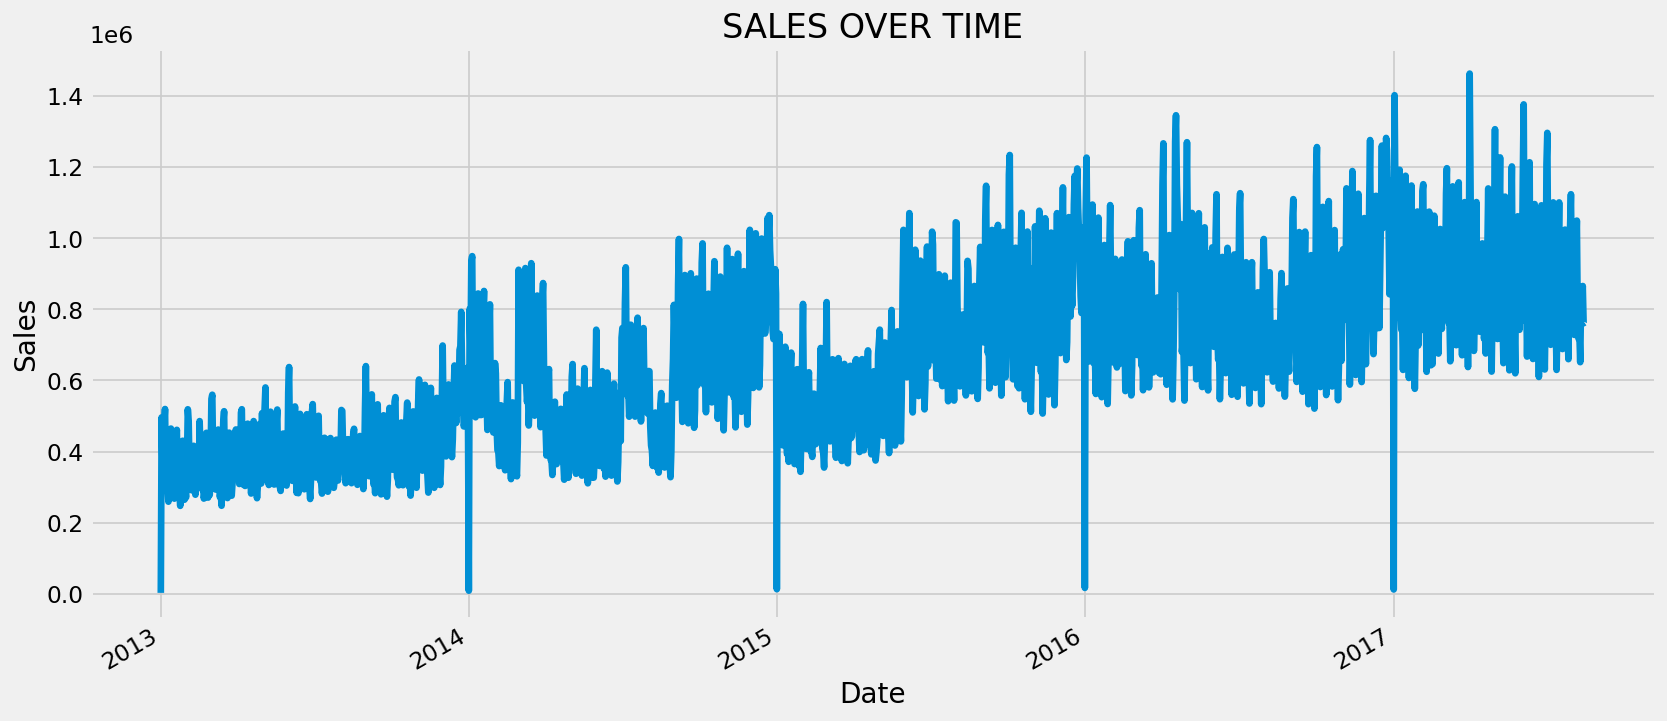

In [170]:
sales_time = train.groupby("date").sales.sum().reset_index()
sales_time = sales_time.set_index("date")

sales_time.plot(legend=False, figsize=(15, 7))
plt.title("SALES OVER TIME")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.style.use("fivethirtyeight")
plt.show()

Key Insights:
- It can be analyzed there is an increasing sales trend from year to year

#### Exploring tansactions by date

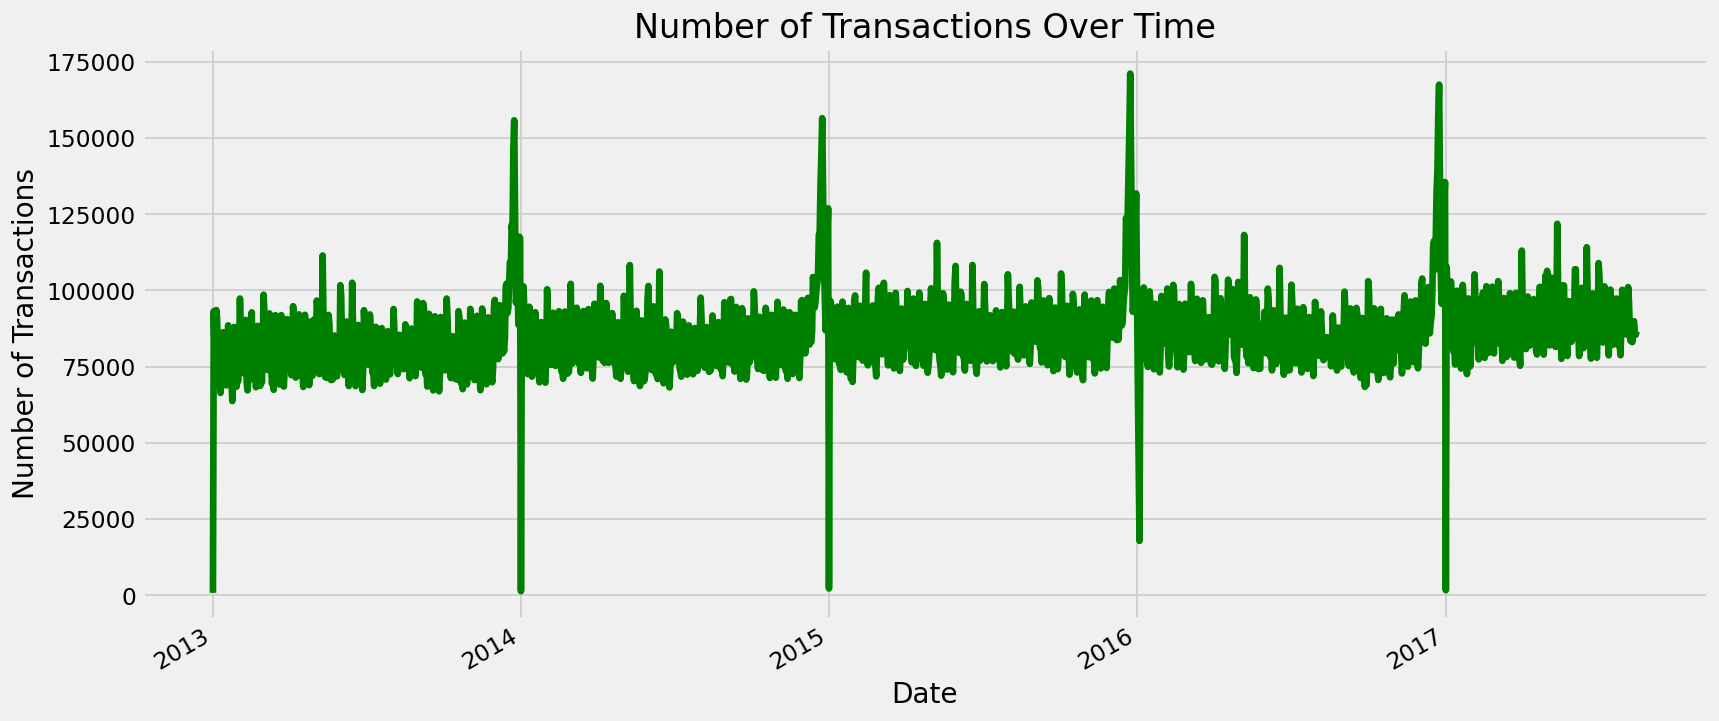

In [171]:
transactions_date = transactions.groupby('date').transactions.sum().reset_index()
transactions_date = transactions_date.set_index("date")

transactions_date.plot(legend=False, color="green", figsize=(15, 7))
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.style.use("fivethirtyeight")
plt.show()

Key Insights:
- Transactions were stationary throughout the recorded years. With the exception, of the ends of the years where there are sharp increases in transactions showing seasonality.

#### Exploring oil data

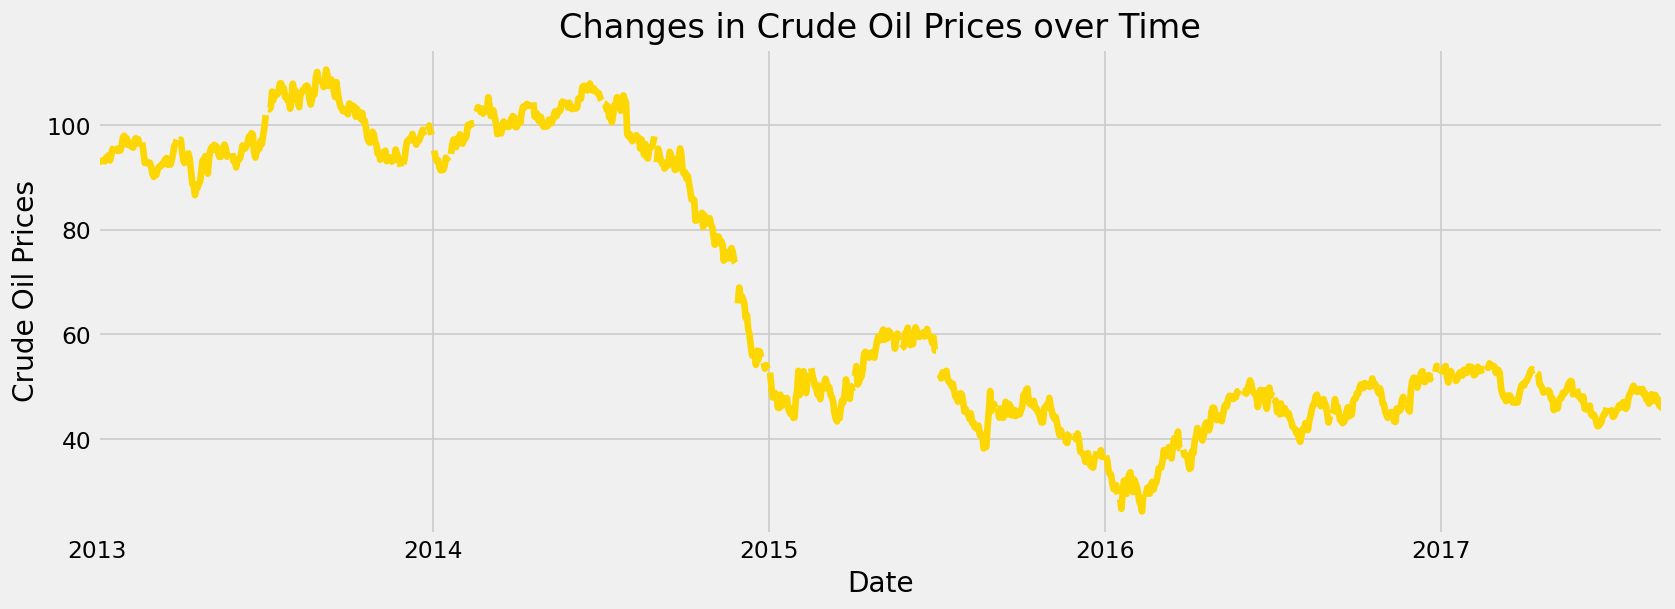

In [172]:
oil.set_index("date")

oil.plot(x="date", y="dcoilwtico", color="gold", legend=False, figsize=(15, 5))
plt.title('Changes in Crude Oil Prices over Time')
plt.xlabel('Date')
plt.ylabel('Crude Oil Prices')
plt.style.use("fivethirtyeight")
plt.show()

Key Insights:
- This shows a decreasing trend in the prices of Crude oil prices on thw world market. Later on, we shall find out if these prices decreases affect affect sales.
Also, breaks in the trend show missing values

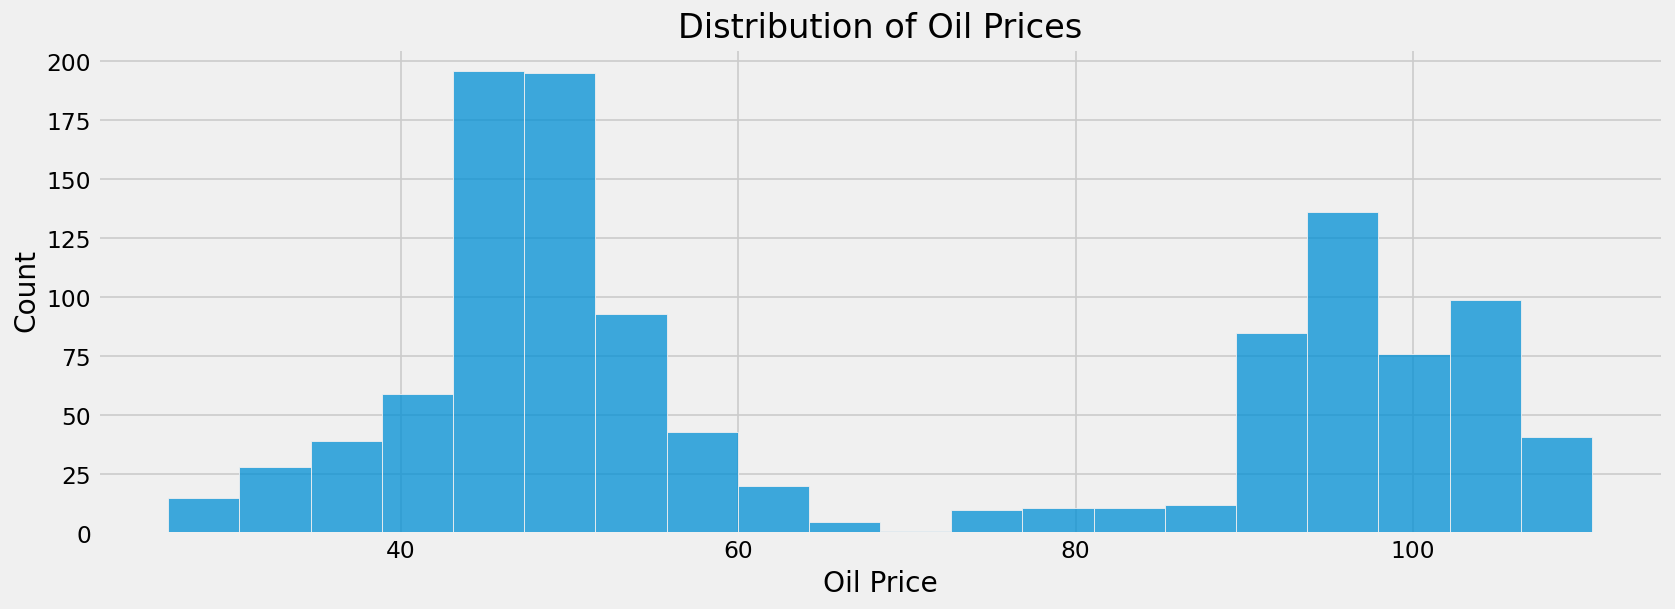

In [173]:
# Visualize the distribution of the oil prices using a histogram:
plt.figure(figsize=(15,5))
sns.histplot(data=oil, x="dcoilwtico", bins=20)
plt.xlabel('Oil Price')
plt.title('Distribution of Oil Prices')
plt.show()

Key Insights:
- The graph shows that the price of crude oil was heavily distributed between 40 and $60 a barrel, per day. Most of the prices of crude oil per day were between this price range.

#### Exploring Stores Data

In [174]:
stores.set_index("store_nbr").head()

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [175]:
stores = stores["type"].value_counts()
stores

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

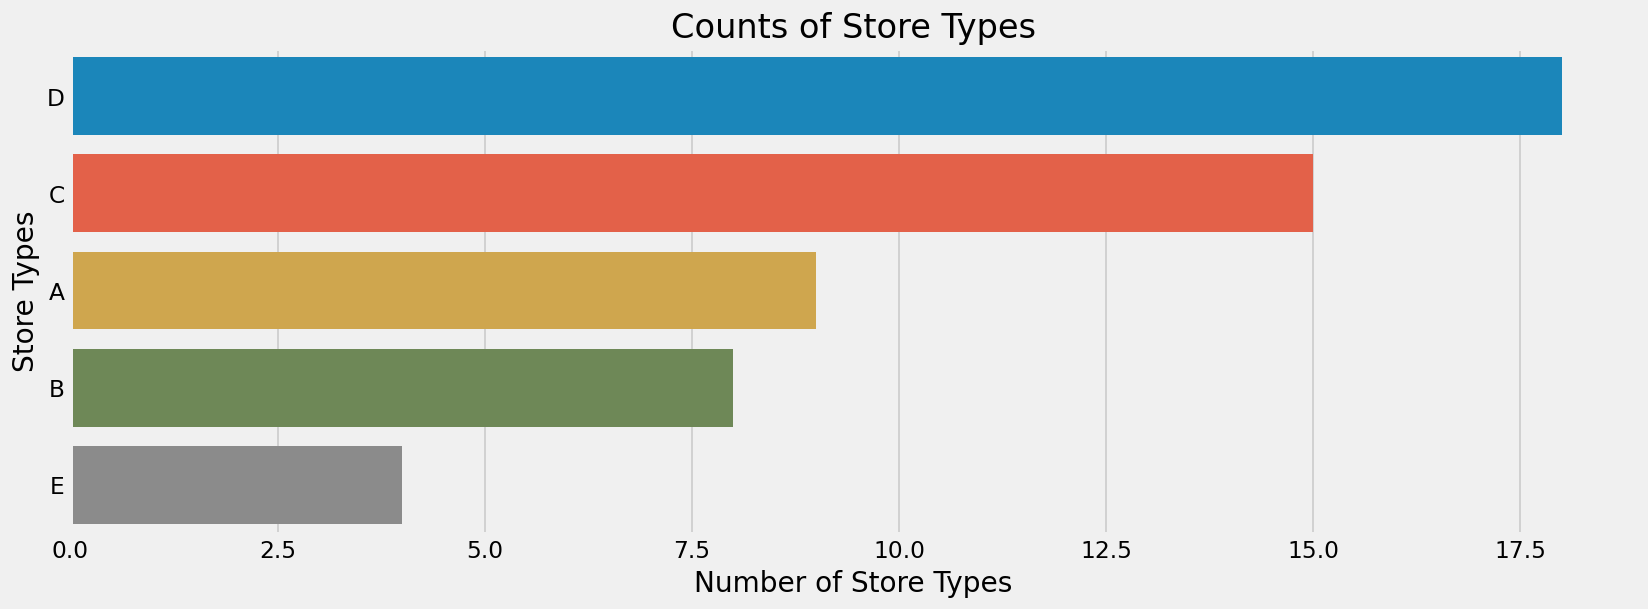

In [176]:
# plotting a vertical bar graph to visualize the count of store types
plt.figure(figsize=(15, 5))
sns.barplot(x=stores.values, y=stores.index)
plt.title('Counts of Store Types')
plt.ylabel('Store Types')
plt.xlabel("Number of Store Types")
plt.style.use("fivethirtyeight")
plt.show()


Key Insights:
- From the chart, Stores category D has the largest number of chains, followed by Stores Category C. Stores Category E has the lowest number of store chains.

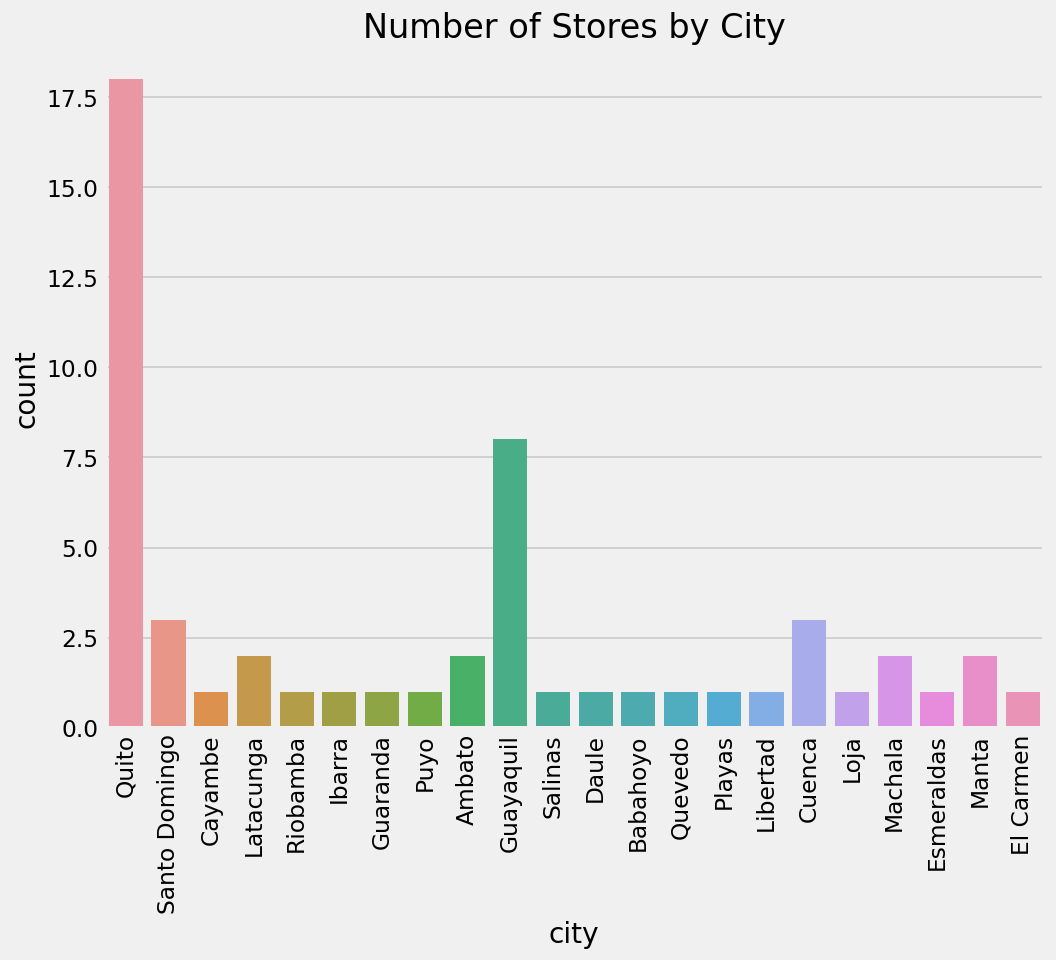

In [177]:
stores = pd.read_csv("table3.csv")
#plt.figure(figsize=(15, 5))

sns.countplot(data=stores, x='city')
plt.xticks(rotation=90)
plt.title('Number of Stores by City')
plt.show()

Key Insights:
- The graph above depicts that Quito has the highest number of stores, followed by Gayaquil, Santo Domingo and Quenca.

#### Exploring Holidays Data

In [178]:
# Checking holidays that were transferred
holidays[holidays.transferred == True]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


These were holidays that were transferred to other dates

In [179]:
# Checking corresponding dates on which holidays were transferred to
holidays[holidays.type == "Transfer"]

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False



These were that transferred holidays were observed

In [180]:
# Checking "Holidays" that were celebrated on actual days and not transferred
holidays[(holidays.type == "Holiday") & (holidays.transferred == False)]

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
337,2017-11-11,Holiday,Local,Latacunga,Independencia de Latacunga,False
338,2017-11-12,Holiday,Local,Ambato,Independencia de Ambato,False
341,2017-12-08,Holiday,Local,Loja,Fundacion de Loja,False
344,2017-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False


Theses holidays were not transferred but were celebrated on their actual days

In [181]:
# Checking  Bridge holidays
holidays[holidays.type == "Bridge"]

,date,type,locale,locale_name,description,transferred
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False


These were days that that were added holidays to extend the break across a long holiday weekend

In [182]:
# Checking for Work days
holidays[holidays.type == "Work Day"]

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


These were non-working days that observed as working days to pay back for the bridge

In [183]:
# Checking additional holidays
holidays[holidays.type == "Additional"]

,date,type,locale,locale_name,description,transferred
28,2012-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
31,2012-12-21,Additional,National,Ecuador,Navidad-4,False
33,2012-12-22,Additional,National,Ecuador,Navidad-3,False
34,2012-12-23,Additional,National,Ecuador,Navidad-2,False
36,2012-12-24,Additional,National,Ecuador,Navidad-1,False
38,2012-12-26,Additional,National,Ecuador,Navidad+1,False
40,2012-12-31,Additional,National,Ecuador,Primer dia del ano-1,False
53,2013-05-11,Additional,National,Ecuador,Dia de la Madre-1,False
64,2013-07-24,Additional,Local,Guayaquil,Fundacion de Guayaquil-1,False
81,2013-12-05,Additional,Local,Quito,Fundacion de Quito-1,False


These are additional days added to regular calendar holidays.

In [184]:
# checking the holiday type which is event
holidays[holidays.type == "Event"]

,date,type,locale,locale_name,description,transferred
55,2013-05-12,Event,National,Ecuador,Dia de la Madre,False
103,2014-05-11,Event,National,Ecuador,Dia de la Madre,False
106,2014-06-12,Event,National,Ecuador,Inauguracion Mundial de futbol Brasil,False
107,2014-06-15,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Suiza,False
108,2014-06-20,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Honduras,False
113,2014-06-25,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Francia,False
114,2014-06-28,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
115,2014-06-29,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
116,2014-06-30,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
117,2014-07-01,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False


These were days observed for special events

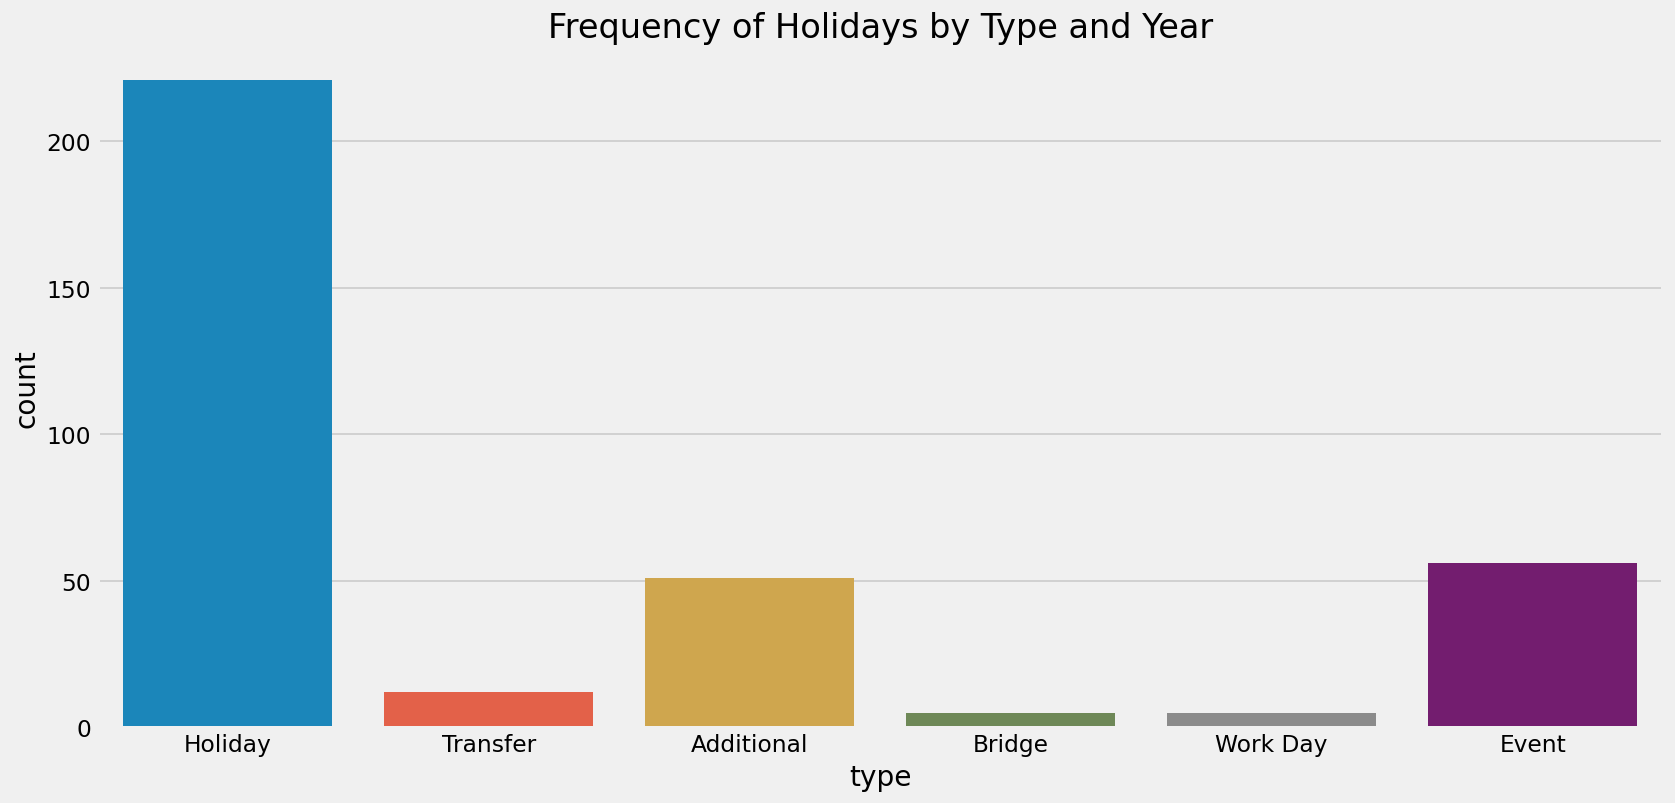

In [185]:
# Visualize the frequency of holidays by type and year:
plt.figure(figsize=(15,7))
sns.countplot(data=holidays, x='type')
plt.title('Frequency of Holidays by Type and Year')
plt.show()

**2.3.2 Bivariate Analysis:**
     Investigate relationships between pairs of variables.

**Checking for the relationship between oil price and sales**

In [186]:
sales = train.groupby("date").sales.sum()
sales

date
2013-01-01      2511.618999
2013-01-02    496092.417944
2013-01-03    361461.231124
2013-01-04    354459.677093
2013-01-05    477350.121229
                  ...      
2017-08-11    826373.722022
2017-08-12    792630.535079
2017-08-13    865639.677471
2017-08-14    760922.406081
2017-08-15    762661.935939
Name: sales, Length: 1684, dtype: float64

In [187]:
oil_sales = pd.merge(sales, oil, on="date", how="left")
oil_sales = oil_sales.rename(columns={"dcoilwtico" : "oil_price"})
oil_sales = oil_sales.set_index("date").dropna()
oil_sales.head()

,sales,oil_price
date,,
2013-01-02,496092.417944,93.139999
2013-01-03,361461.231124,92.970001
2013-01-04,354459.677093,93.120003
2013-01-07,336122.801066,93.199997
2013-01-08,318347.777981,93.209999


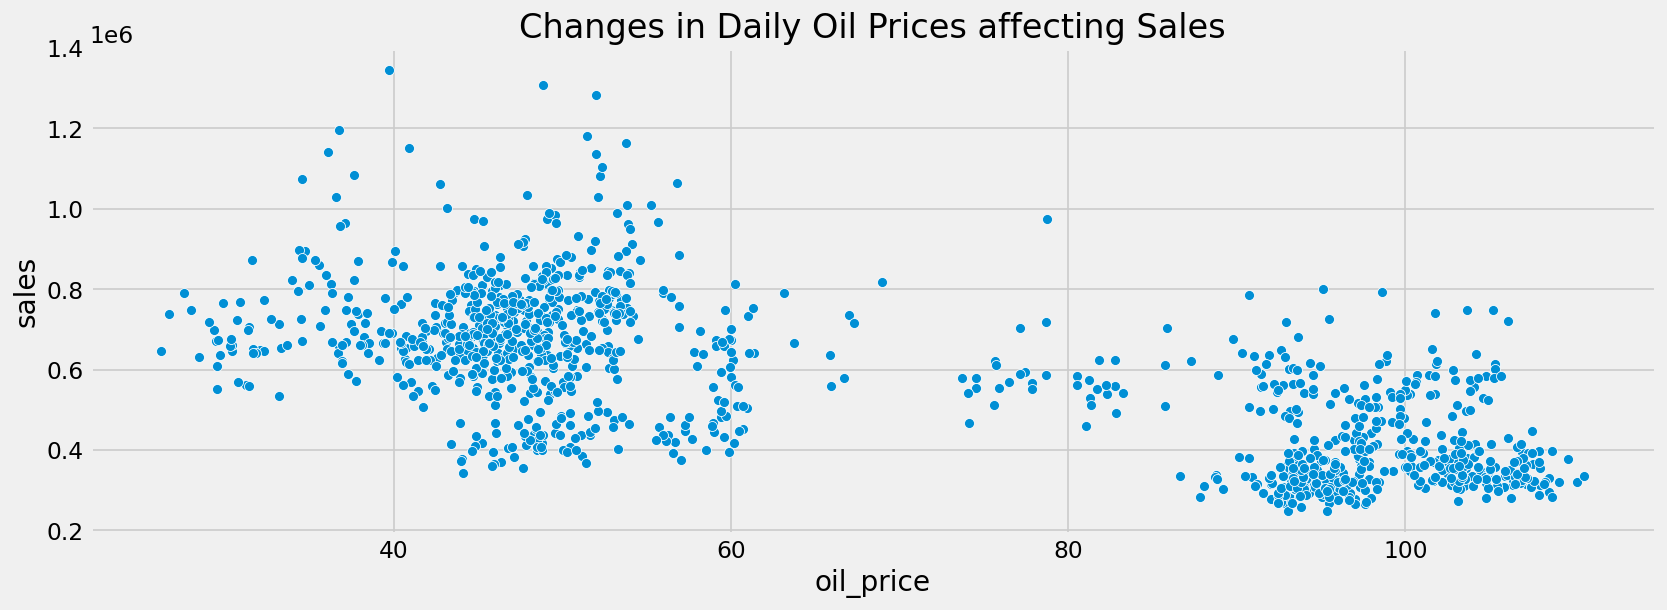

In [188]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=oil_sales, x="oil_price", y="sales", palette="Blues_r", legend=False)
plt.title("Changes in Daily Oil Prices affecting Sales")
plt.show()


Key Insights:
- From the scatter plot, it can be realized that the relationship between oil price and sales is negatively correlated. As oil prices increase, sales reduces.

**Checking for the relationship between Transactions and Sales**

In [189]:
trans_data = transactions.groupby("date").sum().drop("store_nbr", axis=1)
transactions_sales = pd.merge(trans_data, sales, on="date", how="left")
transactions_sales.head()

,transactions,sales
date,,
2013-01-01,770,2511.618999
2013-01-02,93215,496092.417944
2013-01-03,78504,361461.231124
2013-01-04,78494,354459.677093
2013-01-05,93573,477350.121229


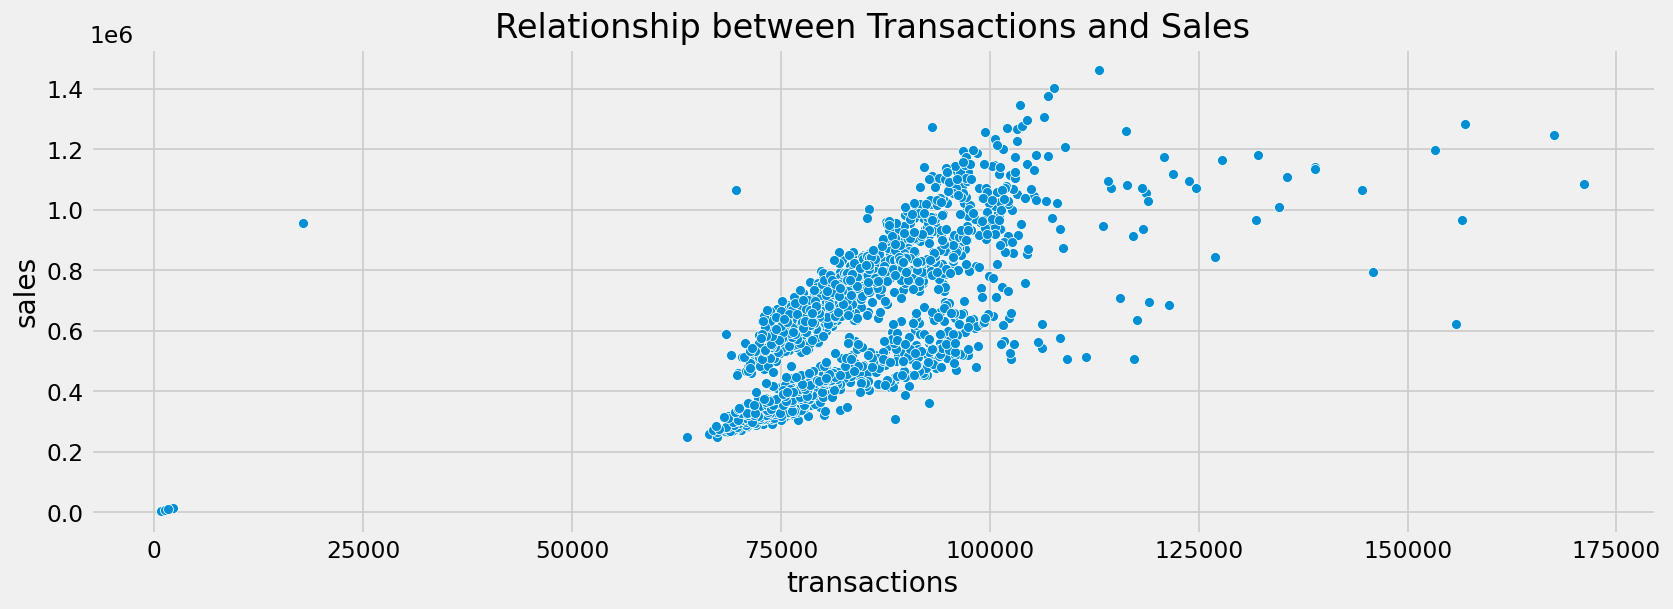

In [190]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=transactions_sales, x="transactions", y="sales", palette="Blues_r", legend=False)
plt.title("Relationship between Transactions and Sales")
plt.show()


Key Insights:
- From the plot, sales and trasactions at different stores have a positive correlation. Generally, as transactions at the different stores increase, so does sales.

**Checking for the relationship between Transactions and Oil**

In [191]:
oil_transactions = pd.merge(trans_data, oil, on="date", how="left").dropna()
oil_transactions = oil_transactions.rename(columns={"dcoilwtico" : "oil_price"})
oil_transactions.head()

,date,transactions,oil_price
1,2013-01-02,93215,93.139999
2,2013-01-03,78504,92.970001
3,2013-01-04,78494,93.120003
6,2013-01-07,75597,93.199997
7,2013-01-08,72325,93.209999


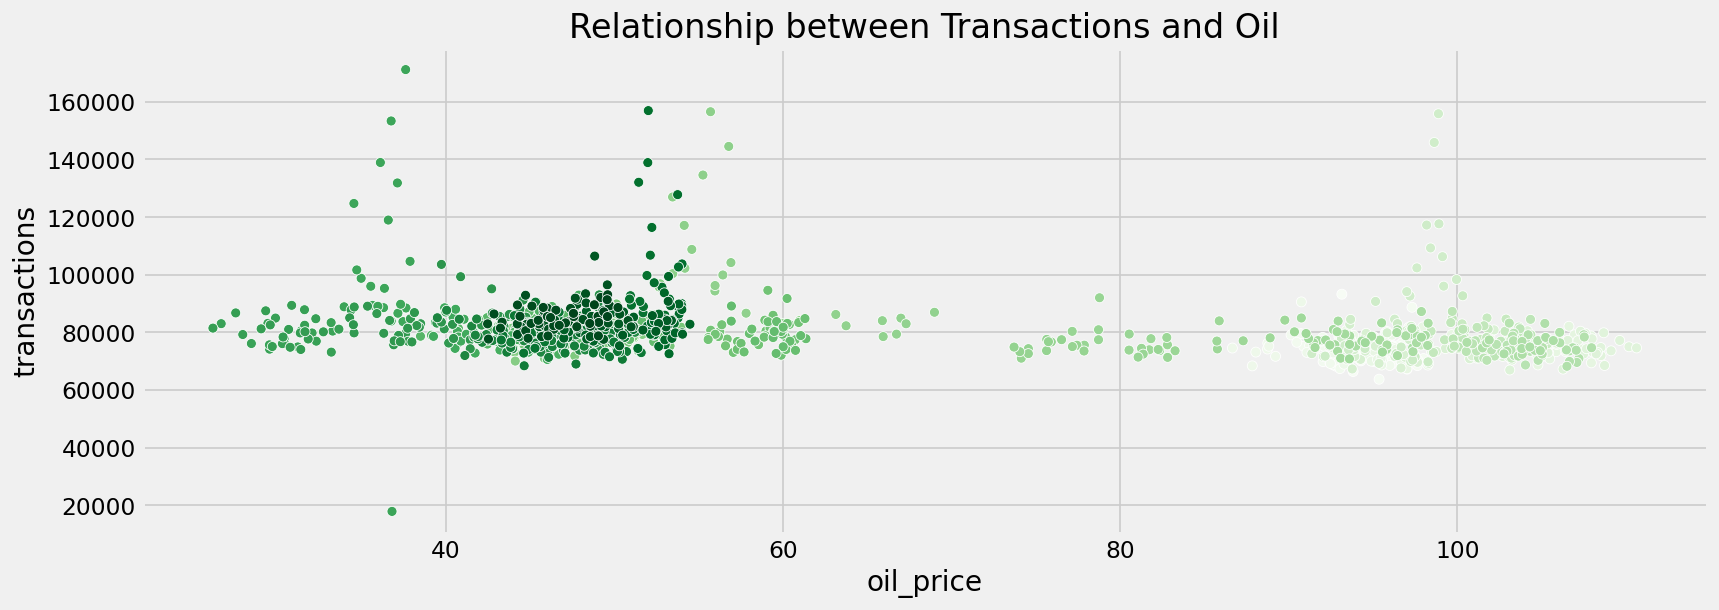

In [192]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=oil_transactions, x="oil_price", y="transactions", palette="Greens", hue="date",
                legend=False)
plt.title("Relationship between Transactions and Oil")
plt.show()


Key Insights:
- The relationship between oil and transaction is stationary. A change in oil price does not necessarily calls for a change in transactions at the stores. However, there are some outlier values which may be caused other factors such as the holiday seasons 

**2.3.3 Multivariate Analysis:**
     Examine interactions between three or more variables.

In [ ]:
correlation = df.corr(numeric_only=True)

correlation

**2.4 Answering Analytical Questions:**
     Visualizations

Question 1:Is the train dataset complete?

In [194]:
missing_date = pd.date_range(start="2013-01-01", end="2017-08-15").difference(train.date)
list(missing_date)

[Timestamp('2013-12-25 00:00:00'),
 Timestamp('2014-12-25 00:00:00'),
 Timestamp('2015-12-25 00:00:00'),
 Timestamp('2016-12-25 00:00:00')]

Insights:
- We can realize that 25th December of 2013, 2014, 2015 and 2016 are missing

Question 2:Which dates have the lowest and highest sales for each year?

<Figure size 1800x840 with 0 Axes>

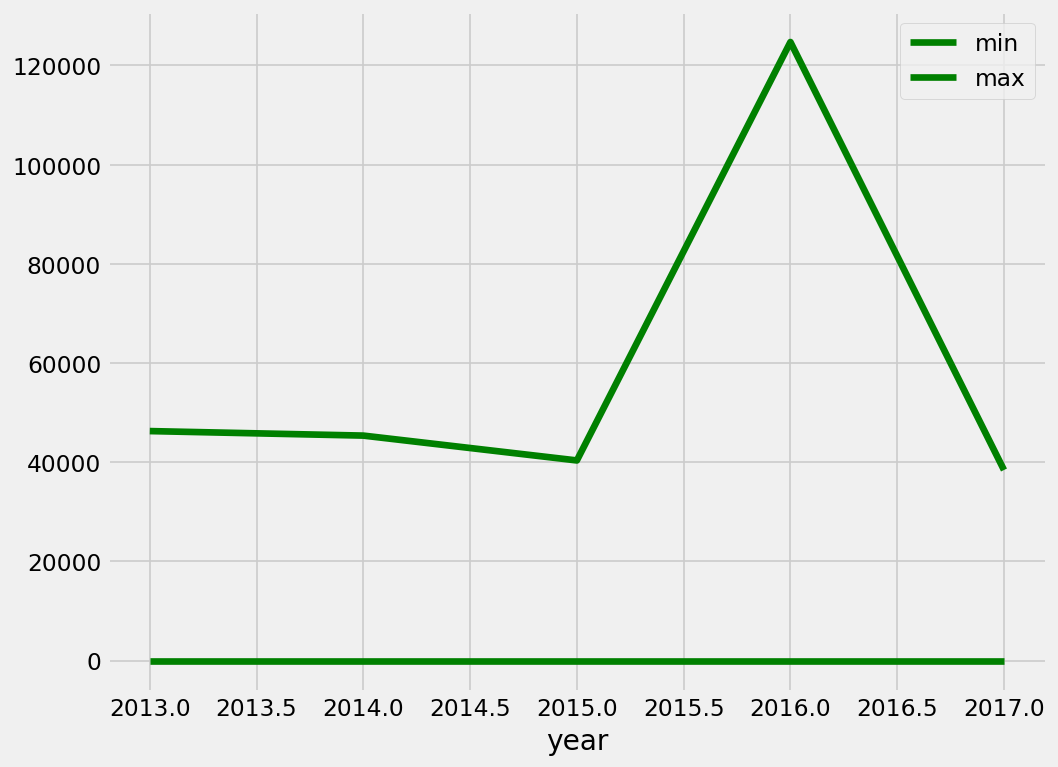

In [195]:
plt.figure(figsize=(15,7))

train["date"] = pd.to_datetime(train["date"])
train["year"] = train["date"].dt.year
sales_by_year = train.groupby("year")["sales"].agg(["min", "max"])
sales_by_year.plot(kind="line", color="green")

plt.show()

Question 3:Did the earthquake impact sales? (april 16, 2016) 

In [ ]:
#converting to same datatype
train['date'] = pd.to_datetime(train['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

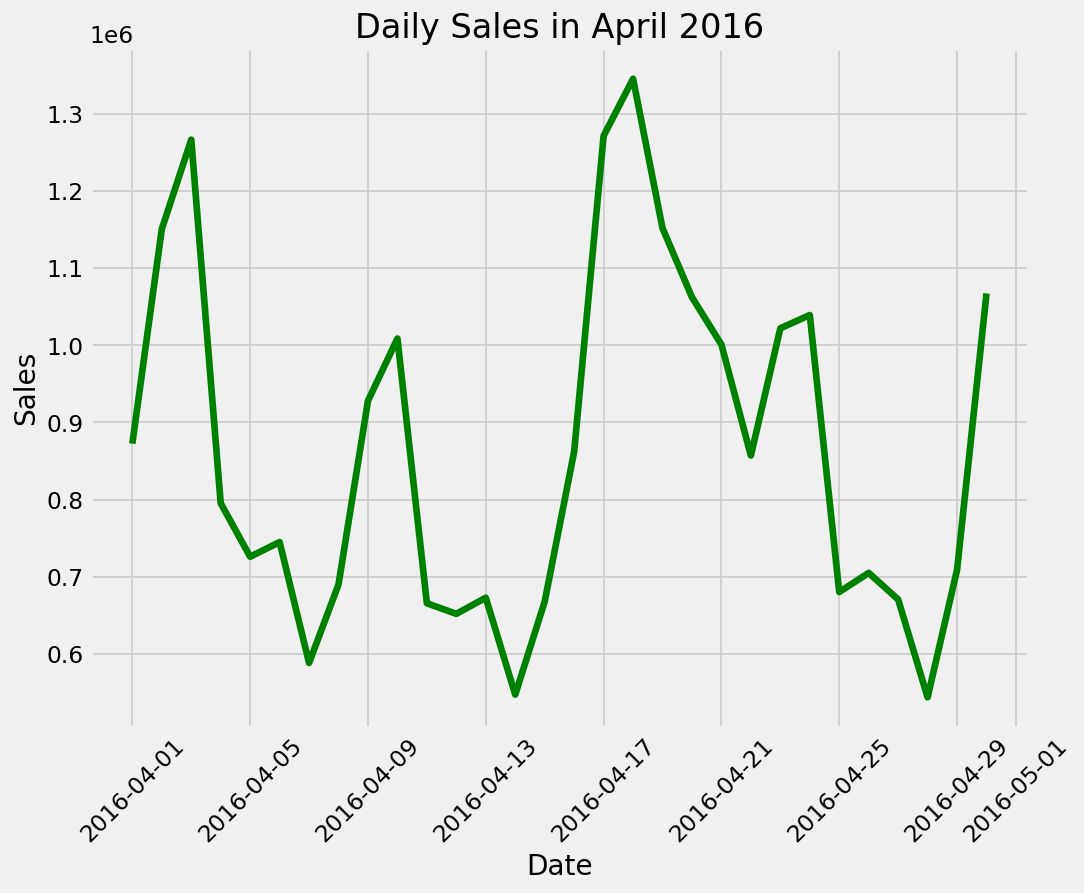

In [ ]:
sales_df = pd.merge(train, transactions, on=['date', 'store_nbr'])
april_sales = sales_df[(sales_df['date'] >= '2016-04-01') & (sales_df['date'] <= '2016-04-30')]
daily_sales = april_sales.groupby('date')['sales'].sum()
plt.plot(daily_sales.index, daily_sales.values, color="green")
plt.title('Daily Sales in April 2016')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

Insights:
- The earthquake had no visible impact on sales. The graph above shows that sales increased continuously between 14th April, 2016 through to 18th April, 2016. 
- The date for the earthquake was 16th April, 2016. On this date, sales coninued the increasing momentum.

Question 4:Are certain groups of stores selling more products? (Cluster, city, state, type)

<Figure size 1800x840 with 0 Axes>

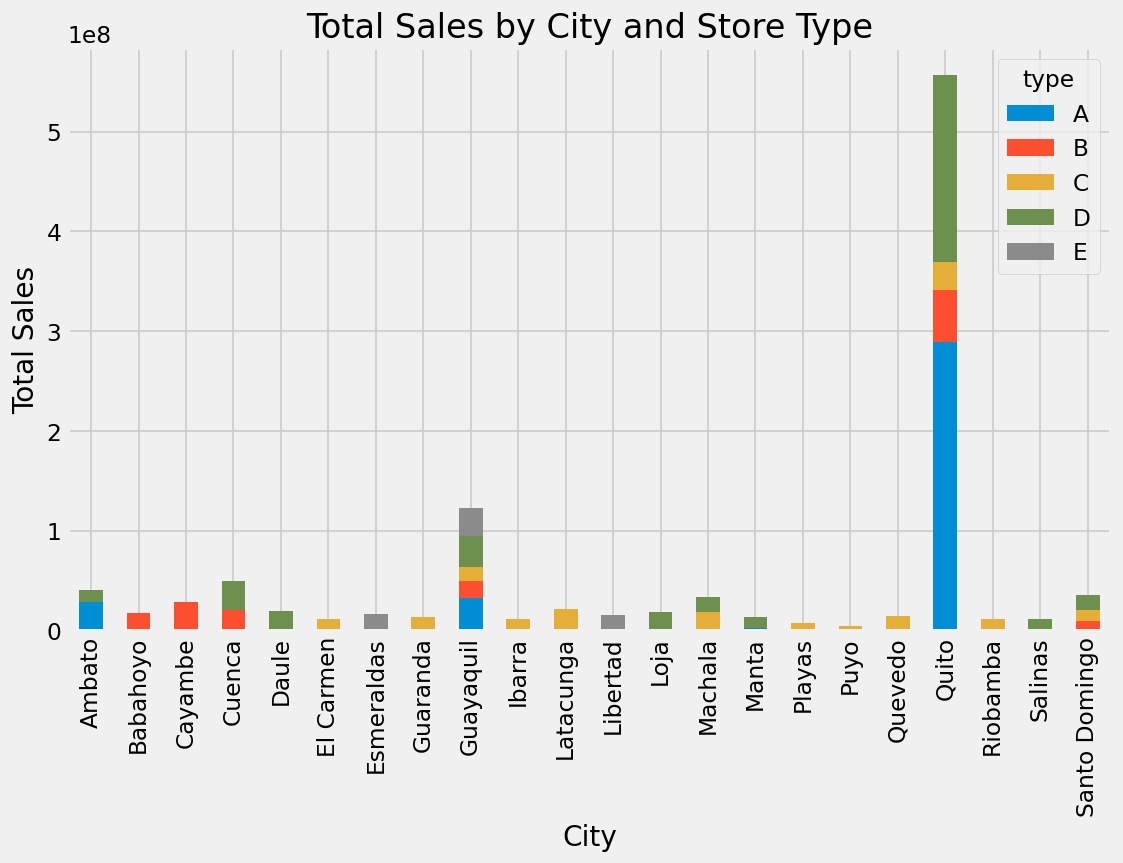

In [ ]:
# sales by store type bar chart
plt.figure(figsize=(15, 7))
merged = pd.merge(train, stores, on="store_nbr")
grouped = merged.groupby(["city", "state", "type"])["sales"].sum().reset_index()
pivoted = grouped.pivot(index="city", columns="type", values="sales")
ax = pivoted.plot(kind="bar", stacked=True, figsize=(10, 6))
ax.set_xlabel("City")
ax.set_ylabel("Total Sales")
ax.set_title("Total Sales by City and Store Type")

plt.show()

Insights:
- Store Type A tends to sell more products. Their sales were more densed in Quito.Store Type C also sold more products with the ir sales distributed across over eleven(11) cities.

In [ ]:
# Sum of sales by city

sales_city = merged.groupby("city", as_index=False)["sales"].sum()
sales_city

,city,sales
0,Ambato,4.030440e+07
1,Babahoyo,1.774687e+07
2,Cayambe,2.832556e+07
3,Cuenca,4.916860e+07
4,Daule,1.918802e+07
5,El Carmen,1.105748e+07
6,Esmeraldas,1.639169e+07
7,Guaranda,1.304951e+07
8,Guayaquil,1.229673e+08
9,Ibarra,1.145127e+07


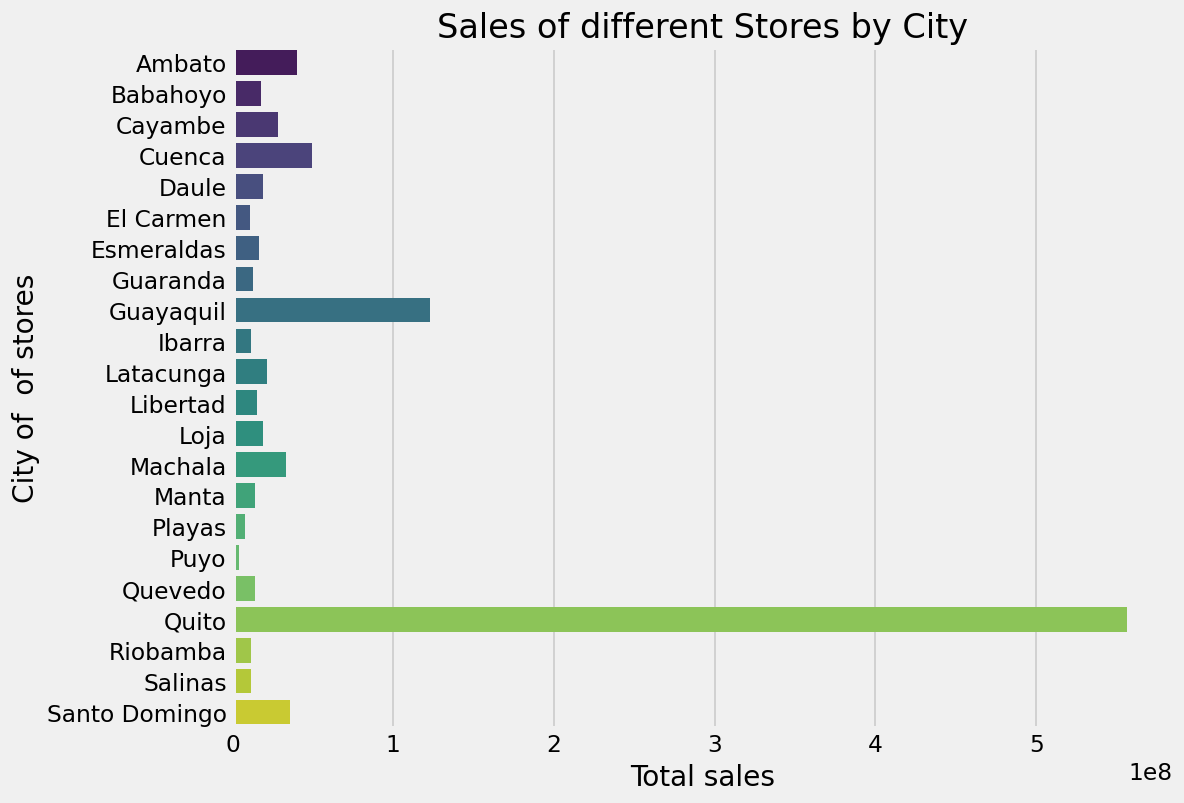

In [ ]:
# horizontal Bar chart of sales by city

sns.barplot(data=sales_city, y = "city", x = "sales", palette='viridis')
plt.ylabel("City of  of stores")
plt.xlabel("Total sales")
plt.title("Sales of different Stores by City")
plt.show()

Insights:
- Quito has the highest total sales, as it is the capital, and Puyo the lowest

In [ ]:
# Sum of sales by store type
sales_type = merged.groupby("type", as_index=False)["sales"].sum()
sales_type

,type,sales
0,A,3.530438e+08
1,B,1.452606e+08
2,C,1.644347e+08
3,D,3.510833e+08
4,E,5.982244e+07


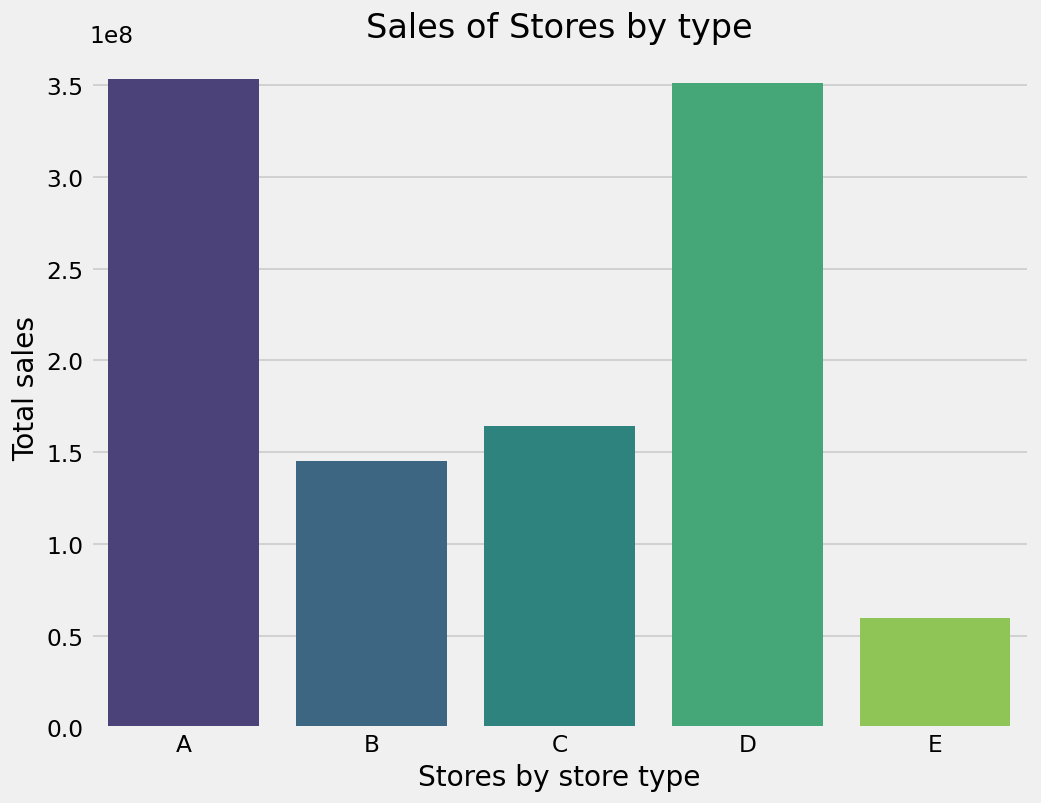

In [ ]:
# vertical Bar chart of sales by store type

sns.barplot(data=sales_type, x = "type", y = "sales", palette='viridis')
plt.xlabel("Stores by store type")
plt.ylabel("Total sales")
plt.title("Sales of Stores by type")
plt.show()

Insights:
- type A nd D have the highest total sales

Question 5:Are sales affected by promotions and oil price?

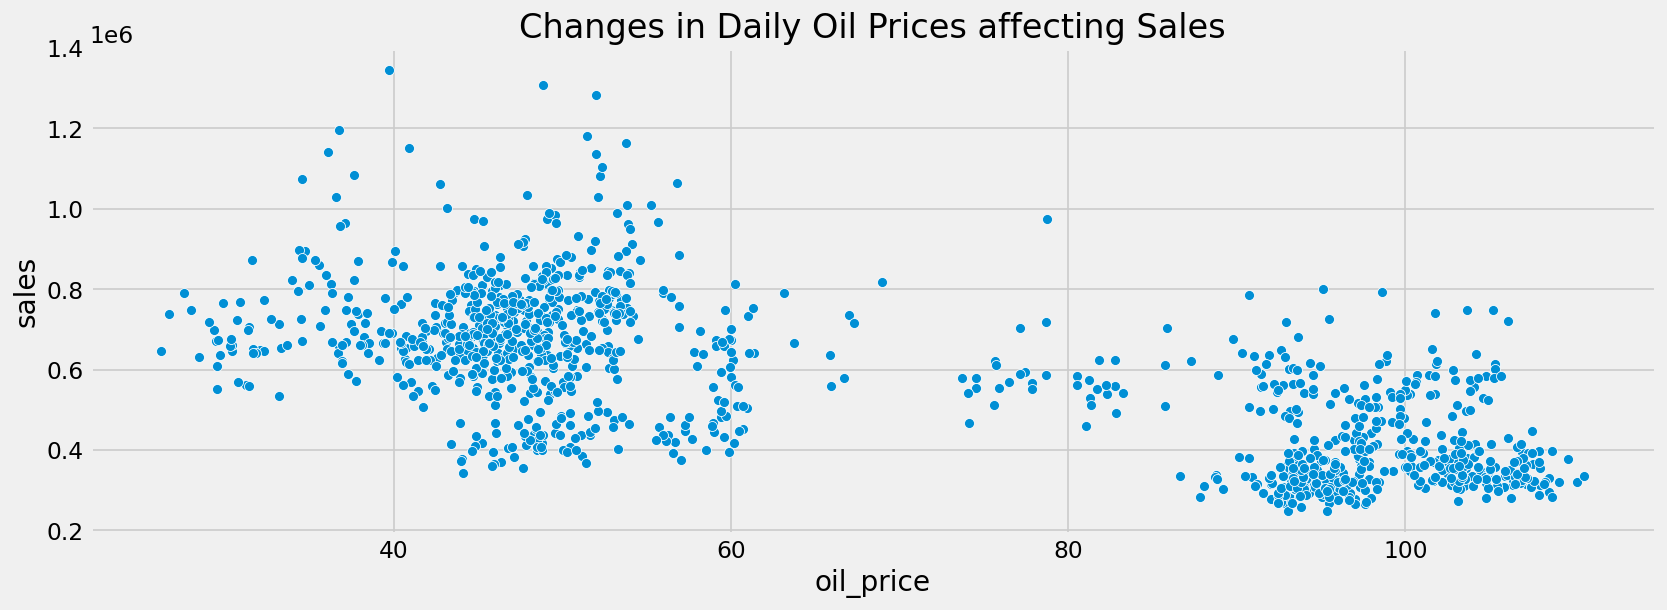

In [ ]:
# Does oil prices affect sales
oil['date'] = pd.to_datetime(oil['date'])
sales = train.groupby("date").sales.sum()

oil_sales = pd.merge(sales, oil, on="date", how="left")
oil_sales = oil_sales.rename(columns={"dcoilwtico" : "oil_price"})
oil_sales = oil_sales.set_index("date").dropna()

plt.figure(figsize=(15,5))
sns.scatterplot(data=oil_sales, x="oil_price", y="sales", palette="Blues_r", legend=False)
plt.title("Changes in Daily Oil Prices affecting Sales")
plt.show()

Insights:
- From the scatter plot, oil prices are directly affected by oil prices. As oil prices increase, sales reduce.

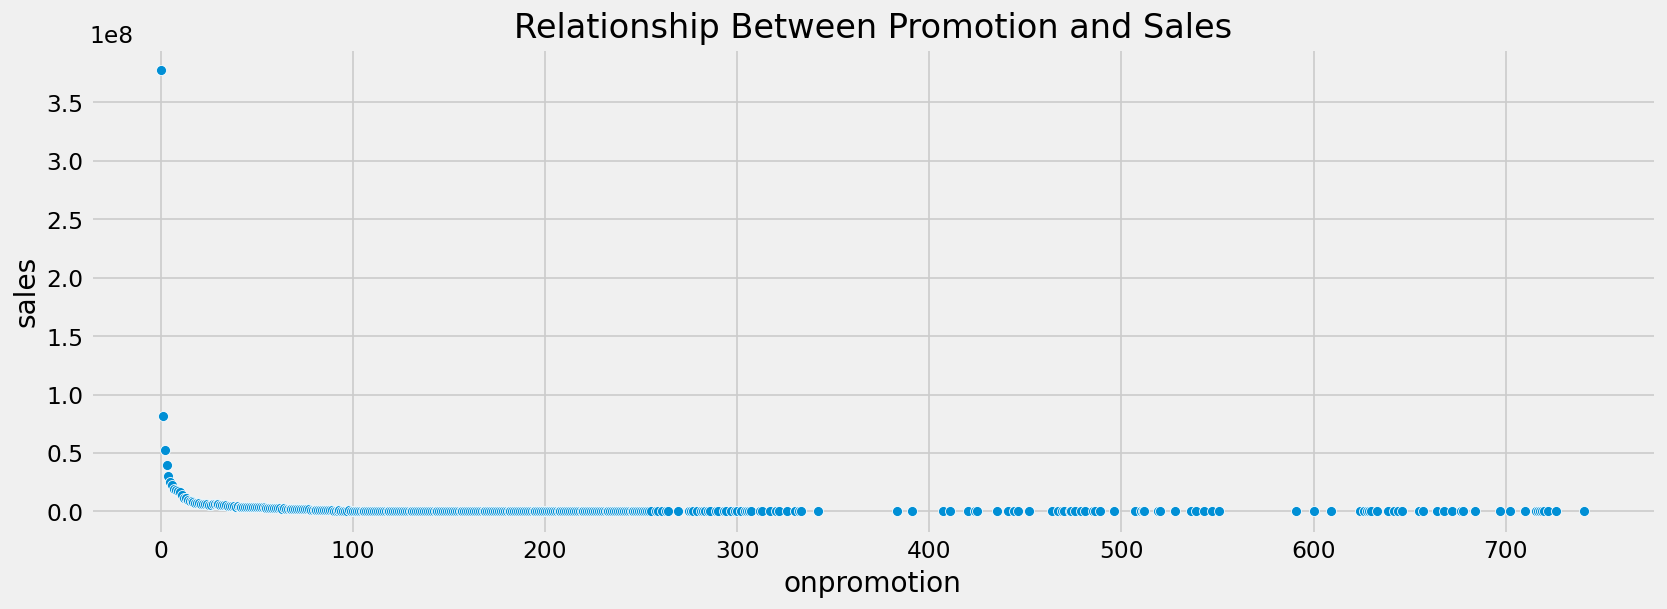

In [ ]:
# Does promotion affect sales

promo_sales = train.groupby("onpromotion")["sales"].sum().reset_index()

plt.figure(figsize=(15,5))
sns.scatterplot(data=promo_sales, x="onpromotion", y="sales", palette="Blues_r", legend=False)
plt.title("Relationship Between Promotion and Sales")
plt.show()

Insights:
- From the scatter plot, sales are less affected by promotion. In certain stores where promotion was 0, sales are much higher than stores where certain products had promotions.

**2.5 Stationarity Test:**

A time series has to have some statistical properties [to be able to be stationary](https://analyzingalpha.com/check-time-series-stationarity-python):

- **Constant mean**: There is no trend over time.
- **Constant variance, covariance**: The scale of the data doesn’t change and the relationship between observations is consistent.
- **No seasonality**: Statistical properties of seasonal data changes regularly. Therefore, there is a pattern of change in the mean.

##### Stating the hypothesis
* H0: Data is stationary, that is if p-value < 0.05
* H1: Data is non-stationary, if the p-value > 0.05

Checking for stationarity  Using Augmented Dickey-Fuller test

In [196]:
# Group the data by Order Date for sum of Sales
sales_df = train.groupby(['date'])['sales'].sum().reset_index()

sales_df

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229
...,...,...
1679,2017-08-11,826373.722022
1680,2017-08-12,792630.535079
1681,2017-08-13,865639.677471
1682,2017-08-14,760922.406081


In [197]:
# resetting the index to the date
sales_df.set_index('date',inplace=True)
#passing the data into the adfuller method
adft = adfuller(sales_df)

In [198]:
# creating a dataframe for the metrics output
output_df = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"],"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]})
output_df

,Metric,Values
0,Test Statistics,-2.616196
1,p-value,0.089696
2,No. of lags used,22.000000
3,Number of observations used,1661.000000
4,critical value (1%),-3.434293
5,critical value (5%),-2.863282
6,critical value (10%),-2.567697


- The p-value is more than 0.05. We reject the null hypothesis that the data is stationary. To be sure of our decision, we perfom kpss test.

##### Checking for stationarity Using KPSS

Null Hypothesis : Series is Stationary

Alternative Hypothesis : Series is not Stationary

In [199]:
kpss_test = kpss(sales_df['sales'])

kpss_df = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used", 
       ],"Values":[kpss_test[0],kpss_test[1],kpss_test[2]]})
kpss_df

,Metric,Values
0,Test Statistics,5.737661
1,p-value,0.010000
2,No. of lags used,24.000000


- The p-value is less than 0.05. We accept the null hypothesis that the series is stationary.

Hypothesis
- Ho (Null Hypothesis): The time series data is non-stationary
- H1 (alternate Hypothesis): The time series data is stationary

#### Autocorrelation

Autocorrelation is a measure of how correlated time series data is at a given point in time with past values.Also known as serial correlation, it measures the relationship between a time series and its lagged values. It quantifies the degree of correlation between observations at different time points within the same series. Autocorrelation is an important concept in time series analysis as it helps identify patterns and dependencies in the data.

In [200]:
#Calculation autocorrelation using autocorr method
#Using one month lag
autocorr_Lag1 = sales_df['sales'].autocorr(lag=1)
print(f"One day Lag:{autocorr_Lag1}")
# Using two months lag
autocorr_Lag30 = sales_df['sales'].autocorr(lag=30)
print(f"Thirty days Lag: {autocorr_Lag30}")
# Using five months lag
autocorr_Lag2 = sales_df['sales'].autocorr(lag=60)
print(f"Two Months Lag:{autocorr_Lag2}")
# Using eight months lag
autocorr_Lag3 = sales_df['sales'].autocorr(lag=90)
print(f"Three Months Lag:{autocorr_Lag3}")
# Using nine months lag
autocorr_Lag4 = sales_df['sales'].autocorr(lag=120)
print(f"Four Months Lag:{autocorr_Lag4}")

One day Lag:0.7668836879523089
Thirty days Lag: 0.4855632882702024
Two Months Lag:0.4444516524599866
Three Months Lag:0.6180981489312599
Four Months Lag:0.49510615188486035


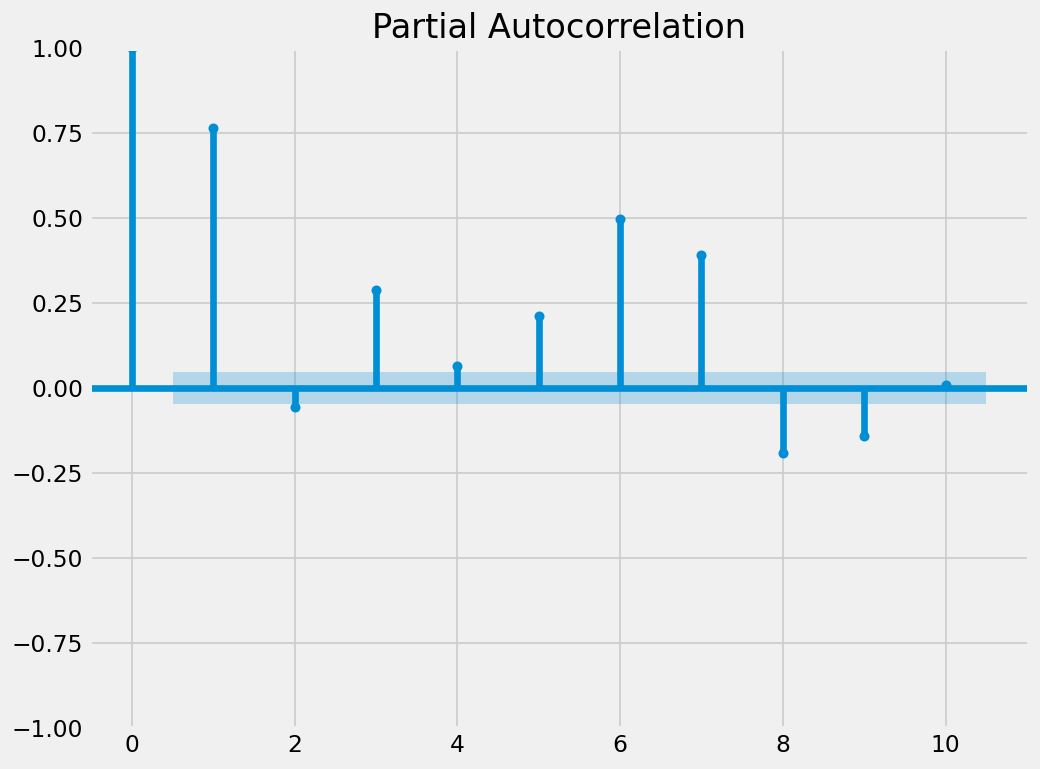

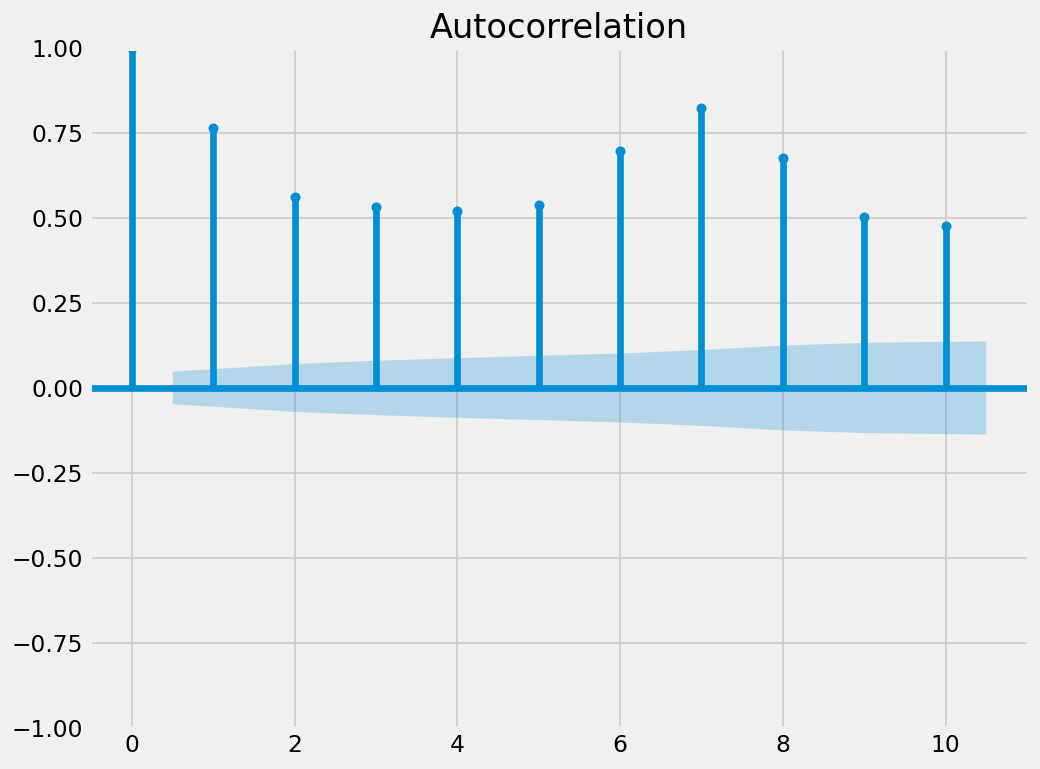

In [201]:
# plotting the correlation with a sales lag of 10
pacf = plot_pacf(sales_df["sales"],lags = 10)
acf = plot_acf(sales_df["sales"], lags = 10)

- In autocorrelation (ACF) plot, each bar represents the correlation between the time series and its lagged values at different lags. This suggests that there is a positive correlation between the sales and its lagged values at all lags.

- On the other hand, in the partial autocorrelation (PACF) plot, each bar represents the correlation between the time series and its lagged values while removing the effects of the intermediate lags. The PACF helps to identify the direct influence of each lag on the current value. Positive values indicate a positive correlation, while negative values indicate a negative correlation. In this case, the presence of three negative values in the PACF plot suggests a negative correlation between the sales and the corresponding lags, while all the other positive values indicate a positive correlation

### Removing Non-Stationarity in the Dataset

Box-Cox transformation is a mathematical transformation that can be applied to stabilize the variance of a time series data and make it more suitable for certain statistical analysis or modeling techniques.

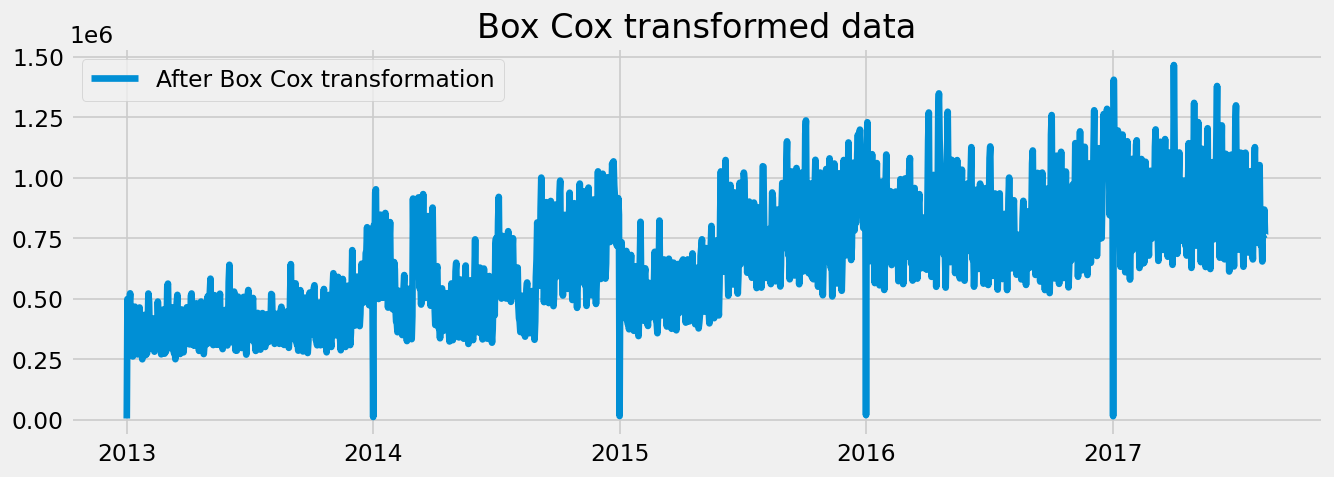

In [203]:
# Apply a shift to make the data positive
shifted_data = sales_df['sales'] + abs(sales_df['sales'].min()) + 1 # This was to handle an error, saying the dataframe contains non-negative values

# Perform Box-Cox transformation on the shifted data
data_boxcox = pd.Series(boxcox(shifted_data, lmbda=1), index=sales_df.index)

# Plot the transformed data 
plt.figure(figsize=(12, 4))
plt.plot(data_boxcox, label='After Box Cox transformation')
plt.legend(loc='best')
plt.title('Box Cox transformed data')
plt.show()

### Removing Trend Using Differencing Method

Differencing is a common technique used to remove trends and seasonality from a time series done by subtracting the shifted version of the Box-Cox transformed series (data_boxcox) from the original series. The shift() function is used to shift the values of data_boxcox by one position. By subtracting the shifted series from the original series, the differenced series is created.

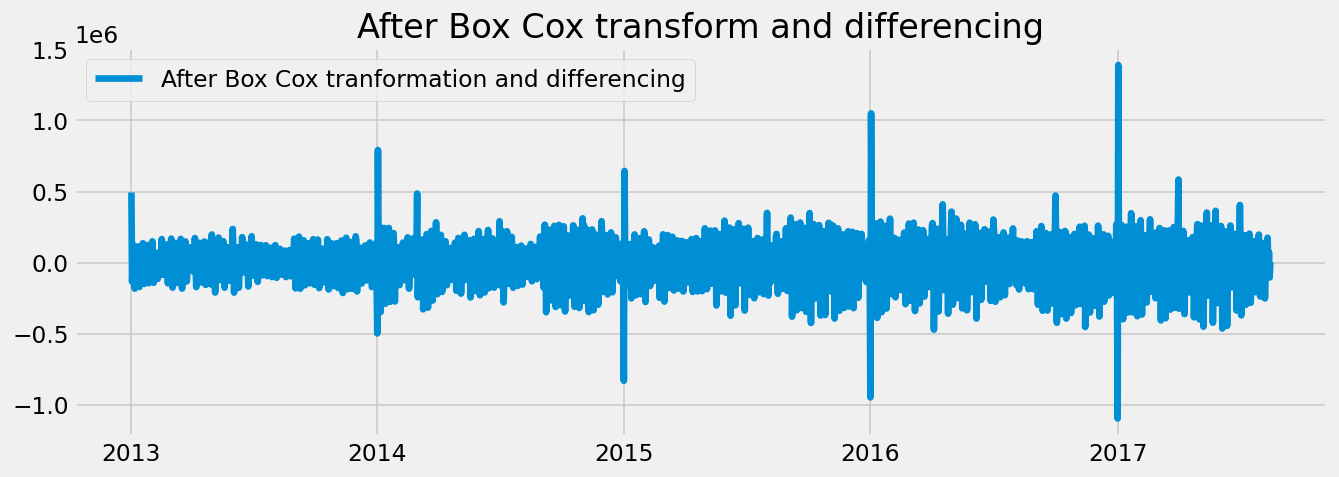

In [204]:
# using difference to remove trend
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data_boxcox.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [205]:
# checking for null values after using differencing method
data_boxcox_diff.isna().sum()

1

In [206]:
# Removing the null values after making the shift
data_boxcox_diff.dropna(inplace=True)

In [207]:
# using KPSS test to check for stationarity
kpss_tst = kpss(data_boxcox_diff)
kpss_tst = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used", 
       ],"Values":[kpss_tst[0],kpss_tst[1],kpss_tst[2]]})
kpss_tst

,Metric,Values
0,Test Statistics,0.06791
1,p-value,0.10000
2,No. of lags used,54.00000


**2.6 Hypothesis Testing:**

**Null Hypothesis (H0)**:
"There is no significant relationship between store sales and promotions."

**Alternative Hypothesis (Ha)**:
"There is a significant relationship between store sales and churn promotions."

In [ ]:
# copy train dataset so that we work with a copy, not the original
train_copy = train.copy()
# encode categorical features
train_copy['onpromotion_encoded'] = np.where(train_copy['onpromotion'] >= 1, 1, 0)
train_copy['onpromotion_encoded'].value_counts()

0    2389559
1     611329
Name: onpromotion_encoded, dtype: int64

##### T-test

The t-test is a statistical hypothesis test that assesses whether the means of two groups are significantly different from each other (an independent two-sample t-test)

In [ ]:
# Extract the sales of products when they are on promotion and when they are not
sales_on_promotion = train_copy[train_copy['onpromotion_encoded'] == 1]['sales']
sales_not_on_promotion = train_copy[train_copy['onpromotion_encoded'] == 0]['sales']

# Calculate the sample sizes
n1 = len(sales_on_promotion)
n2 = len(sales_not_on_promotion)

# Calculate the degrees of freedom
degrees_of_freedom = n1 + n2 - 2  # Assuming equal variances, subtract 2 for two samples

# Set the significance level
alpha = 0.05

# Calculate the critical t-values for a two-tailed test
critical_t_value = t.ppf(1 - alpha / 2, degrees_of_freedom)

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(sales_on_promotion, sales_not_on_promotion)

# Print the t-statistic, p-value, degrees of freedom, and critical t-values
print("t-statistic:", t_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", degrees_of_freedom)
print(f"Critical t-value (α = {alpha/2}):", -critical_t_value)  # Left tail
print(f"Critical t-value (α = {alpha/2}):", critical_t_value)   # Right tail

# Check if the absolute t-statistic falls within the critical value range
if t_stat >= -critical_t_value and t_stat <= critical_t_value:
    print("\nThe absolute t-statistic falls within the critical value range.")
else:
    print("\nThe absolute t-statistic does not fall within the critical value range.")


t-statistic: 664.1236909096903
p-value: 0.0
Degrees of Freedom: 3000886
Critical t-value (α = 0.025): -1.9599647750639762
Critical t-value (α = 0.025): 1.9599647750639762

The absolute t-statistic does not fall within the critical value range.


- There is a statistically significant difference in sales between products when they are on promotion and when they are not on promotion (p-value < 0.05) and the t-statistic does not fall within the critical value range
- We have strong evidence to **reject the null hypothesis!!**

## 3.0 Data Preparation

##### Data Issues

- Deal with missing vales after merging,and adding missing dates
- Rename a few columns to be more readable
- Ensure dtypes are correct for each column

In [208]:
#Converting the date column into datetime datatype
train['date'] = pd.to_datetime(train['date'])

#drop the unnecessary column
train.drop('id',axis=1,inplace=True)

In [209]:
# Checking for completeness of the dates
# Min and max dates (range of dates)
train['date'].min(),train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [210]:
#Converting the date column into date
train['date'] =train['date'].dt.date

In [211]:
#Checking for the range of the dates column
dates_range = pd.date_range(start=train['date'].min(),end=train['date'].max())
dates_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [212]:
#Checking for the missing dates
dates_missing = set(dates_range.date) - set(train['date'].unique())
dates_missing

{datetime.date(2013, 12, 25),
 datetime.date(2014, 12, 25),
 datetime.date(2015, 12, 25),
 datetime.date(2016, 12, 25)}

In [213]:
#Creating a dataframe with the values in the date range
date_df = pd.DataFrame(index=dates_range)
date_df

""
2013-01-01
2013-01-02
2013-01-03
2013-01-04
2013-01-05
...
2017-08-11
2017-08-12
2017-08-13
2017-08-14


In [214]:
# Convert 'date' column in train DataFrame to datetime format
train['date'] = pd.to_datetime(train['date'])
#Merging the missing dates with the train dataset
train_merged = date_df.merge(train, how='left', left_index=True, right_on='date')
train_merged.head()

,date,store_nbr,family,sales,onpromotion,year
0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,2013.0
1.0,2013-01-01,1.0,BABY CARE,0.0,0.0,2013.0
2.0,2013-01-01,1.0,BEAUTY,0.0,0.0,2013.0
3.0,2013-01-01,1.0,BEVERAGES,0.0,0.0,2013.0
4.0,2013-01-01,1.0,BOOKS,0.0,0.0,2013.0


In [215]:
train_merged.isna().sum()

date           0
store_nbr      4
family         4
sales          4
onpromotion    4
year           4
dtype: int64

In [216]:
# Sort the merged DataFrame by date
train_merged = train_merged.sort_values('date')
# Resetting the index
train_merged = train_merged.reset_index(drop=True)
train_merged.head()

,date,store_nbr,family,sales,onpromotion,year
0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,2013.0
1,2013-01-01,42.0,CELEBRATION,0.0,0.0,2013.0
2,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0,2013.0
3,2013-01-01,42.0,BOOKS,0.0,0.0,2013.0
4,2013-01-01,42.0,BEVERAGES,0.0,0.0,2013.0


In [217]:
# Performing backfill interpolation on the merged DataFrame
train_merged_interpolated = train_merged.interpolate(method='bfill')
train_merged_interpolated.head()

,date,store_nbr,family,sales,onpromotion,year
0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,2013.0
1,2013-01-01,42.0,CELEBRATION,0.0,0.0,2013.0
2,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0,2013.0
3,2013-01-01,42.0,BOOKS,0.0,0.0,2013.0
4,2013-01-01,42.0,BEVERAGES,0.0,0.0,2013.0


In [218]:
train_merged_interpolated.isna().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
year           0
dtype: int64

##### Oil dataset 

In [219]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [220]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [221]:
#Converting to date date type
oil['date']=pd.to_datetime(oil['date'])

In [222]:
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [223]:
#Convert into date data type
oil['date'] =oil['date'].dt.date

In [224]:
#checking the date range
oil['date'].min() ,oil['date'].max()

(datetime.date(2013, 1, 1), datetime.date(2017, 8, 31))

In [225]:
# checking the date range of the oil data 
oil_date_range = pd.date_range(start=oil['date'].min(),end=oil['date'].max())
oil_date_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25',
               '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', length=1704, freq='D')

In [226]:
# printing the missing dates from the oil data
missing_oil_dates = set(oil_date_range.date) - set(oil['date'].unique())
missing_oil_dates

{datetime.date(2013, 1, 5),
 datetime.date(2013, 1, 6),
 datetime.date(2013, 1, 12),
 datetime.date(2013, 1, 13),
 datetime.date(2013, 1, 19),
 datetime.date(2013, 1, 20),
 datetime.date(2013, 1, 26),
 datetime.date(2013, 1, 27),
 datetime.date(2013, 2, 2),
 datetime.date(2013, 2, 3),
 datetime.date(2013, 2, 9),
 datetime.date(2013, 2, 10),
 datetime.date(2013, 2, 16),
 datetime.date(2013, 2, 17),
 datetime.date(2013, 2, 23),
 datetime.date(2013, 2, 24),
 datetime.date(2013, 3, 2),
 datetime.date(2013, 3, 3),
 datetime.date(2013, 3, 9),
 datetime.date(2013, 3, 10),
 datetime.date(2013, 3, 16),
 datetime.date(2013, 3, 17),
 datetime.date(2013, 3, 23),
 datetime.date(2013, 3, 24),
 datetime.date(2013, 3, 30),
 datetime.date(2013, 3, 31),
 datetime.date(2013, 4, 6),
 datetime.date(2013, 4, 7),
 datetime.date(2013, 4, 13),
 datetime.date(2013, 4, 14),
 datetime.date(2013, 4, 20),
 datetime.date(2013, 4, 21),
 datetime.date(2013, 4, 27),
 datetime.date(2013, 4, 28),
 datetime.date(2013, 5, 

In [227]:
# converting the date ranges to a df
range_df =  pd.DataFrame(index=oil_date_range)
range_df.head()

""
2013-01-01
2013-01-02
2013-01-03
2013-01-04
2013-01-05


In [228]:
# Convert 'date' column in train DataFrame to datetime format
oil['date'] = pd.to_datetime(oil['date'])

In [229]:
#Merging the missing dates of the oil data with the rest of the columns
oil_merged = range_df.merge(oil, how='left', left_index=True, right_on='date')
oil_merged.head()

,date,dcoilwtico
0.0,2013-01-01,NaN
1.0,2013-01-02,93.139999
2.0,2013-01-03,92.970001
3.0,2013-01-04,93.120003
NaN,2013-01-05,NaN


In [230]:
# Sort the merged DataFrame by date
oil_merged = oil_merged.sort_values('date')
oil_merged

,date,dcoilwtico
0.0,2013-01-01,NaN
1.0,2013-01-02,93.139999
2.0,2013-01-03,92.970001
3.0,2013-01-04,93.120003
NaN,2013-01-05,NaN
...,...,...
NaN,2017-08-27,NaN
1214.0,2017-08-28,46.400002
1215.0,2017-08-29,46.459999
1216.0,2017-08-30,45.959999


In [232]:
# Reset the index
oil_merged = oil_merged.reset_index(drop=True)
oil_merged

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-05,NaN
...,...,...
1699,2017-08-27,NaN
1700,2017-08-28,46.400002
1701,2017-08-29,46.459999
1702,2017-08-30,45.959999


In [233]:
# checking for the missing values in the merged data
oil_merged.isna().sum()

date            0
dcoilwtico    529
dtype: int64

In [234]:
# Perform linear interpolation on the merged DataFrame using bfill
oil_merged_interpolated = oil_merged.interpolate(method='bfill')

In [235]:
oil_merged_interpolated.isna().sum()

date          0
dcoilwtico    0
dtype: int64

##### Holiday events Dataset

In [236]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [237]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [238]:
#Renaming the type column
holidays.rename(columns={'type':'holiday_type'},inplace=True)

In [239]:
#Converting the dates into datetume data type
holidays['date'] = pd.to_datetime(holidays['date'])

In [240]:
# checking the date range of the holiday dataset
holiday_date_range = pd.date_range(start=holidays['date'].min(),end=holidays['date'].max())
holiday_date_range

DatetimeIndex(['2012-03-02', '2012-03-03', '2012-03-04', '2012-03-05',
               '2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10', '2012-03-11',
               ...
               '2017-12-17', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26'],
              dtype='datetime64[ns]', length=2126, freq='D')

In [241]:
missing_holiday_dates = set(holiday_date_range.date) - set(holidays['date'].unique())
missing_holiday_dates

{datetime.date(2012, 4, 18),
 datetime.date(2017, 3, 13),
 datetime.date(2017, 8, 12),
 datetime.date(2013, 9, 14),
 datetime.date(2015, 10, 24),
 datetime.date(2014, 8, 19),
 datetime.date(2012, 9, 28),
 datetime.date(2014, 11, 2),
 datetime.date(2015, 3, 3),
 datetime.date(2012, 3, 26),
 datetime.date(2012, 3, 13),
 datetime.date(2015, 3, 14),
 datetime.date(2017, 2, 26),
 datetime.date(2014, 7, 21),
 datetime.date(2012, 10, 16),
 datetime.date(2014, 6, 18),
 datetime.date(2014, 1, 9),
 datetime.date(2015, 4, 21),
 datetime.date(2014, 4, 2),
 datetime.date(2016, 3, 30),
 datetime.date(2016, 11, 21),
 datetime.date(2015, 10, 19),
 datetime.date(2012, 10, 15),
 datetime.date(2012, 12, 21),
 datetime.date(2017, 11, 19),
 datetime.date(2015, 3, 2),
 datetime.date(2016, 9, 15),
 datetime.date(2015, 2, 9),
 datetime.date(2014, 6, 16),
 datetime.date(2016, 12, 21),
 datetime.date(2015, 2, 2),
 datetime.date(2013, 9, 30),
 datetime.date(2015, 11, 18),
 datetime.date(2013, 8, 13),
 datetime.d

In [242]:
#new holiday dataframe with the date range
holiday_df =  pd.DataFrame(index=holiday_date_range)
holiday_df.head()

""
2012-03-02
2012-03-03
2012-03-04
2012-03-05
2012-03-06


In [243]:
#merging the missing dates with the holiday data
holiday_merged = holiday_df.merge(holidays, how='left', left_index=True, right_on='date')
holiday_merged.head()

,date,holiday_type,locale,locale_name,description,transferred
0.0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
NaN,2012-03-03,NaN,NaN,NaN,NaN,NaN
NaN,2012-03-04,NaN,NaN,NaN,NaN,NaN
NaN,2012-03-05,NaN,NaN,NaN,NaN,NaN
NaN,2012-03-06,NaN,NaN,NaN,NaN,NaN


In [244]:
# Sort the merged DataFrame by date
holiday_merged = holiday_merged.sort_values('date')
# Resetting the index
holiday_merged = holiday_merged.reset_index(drop=True)
holiday_merged.head()

,date,holiday_type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-03-03,NaN,NaN,NaN,NaN,NaN
2,2012-03-04,NaN,NaN,NaN,NaN,NaN
3,2012-03-05,NaN,NaN,NaN,NaN,NaN
4,2012-03-06,NaN,NaN,NaN,NaN,NaN


In [245]:
holiday_merged.isna().sum()

date               0
holiday_type    1814
locale          1814
locale_name     1814
description     1814
transferred     1814
dtype: int64

In [246]:
# Perform interpolation on the merged DataFrame using bfill
holiday_merged_interpolated = holiday_merged.interpolate(method='bfill')
holiday_merged_interpolated.head()

,date,holiday_type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-03-03,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-03-04,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
3,2012-03-05,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
4,2012-03-06,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


In [247]:
holiday_merged_interpolated.isna().sum()

date            0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

#### Transaction dataset

In [248]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [249]:
#Converting the dates into datetume data type
transactions['date']=pd.to_datetime(transactions['date'])

In [250]:
# checking the date range of the transactions data
transactions_date_range = pd.date_range(start=transactions['date'].min(),end=transactions['date'].max())
transactions_date_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [251]:
#Convert into date data type
transactions['date'] =transactions['date'].dt.date
# checking for missing dates in the transaction data
missing_transactions_dates = set(transactions_date_range.date) - set(transactions['date'].unique())
missing_transactions_dates

{datetime.date(2013, 12, 25),
 datetime.date(2014, 12, 25),
 datetime.date(2015, 12, 25),
 datetime.date(2016, 1, 1),
 datetime.date(2016, 1, 3),
 datetime.date(2016, 12, 25)}

In [252]:
# converting the missing dates to a dataframe
transc_df =  pd.DataFrame(index=transactions_date_range)
transc_df.head()

""
2013-01-01
2013-01-02
2013-01-03
2013-01-04
2013-01-05


In [253]:
# Convert 'date' column in train DataFrame to datetime format
transactions['date'] = pd.to_datetime(transactions['date'])

In [254]:
# Adding the missing dates to the transactions data
transactions_merged = transc_df.merge(transactions, how='left', left_index=True, right_on='date')
transactions_merged.head()

,date,store_nbr,transactions
0.0,2013-01-01,25.0,770.0
1.0,2013-01-02,1.0,2111.0
2.0,2013-01-02,2.0,2358.0
3.0,2013-01-02,3.0,3487.0
4.0,2013-01-02,4.0,1922.0


In [255]:
# Sort the merged DataFrame by date
transactions_merged = transactions_merged.sort_values('date')
# Resetting the index
transactions_merged = transactions_merged.reset_index(drop=True)
transactions_merged.head()

,date,store_nbr,transactions
0,2013-01-01,25.0,770.0
1,2013-01-02,30.0,708.0
2,2013-01-02,31.0,1401.0
3,2013-01-02,32.0,776.0
4,2013-01-02,33.0,1163.0


In [256]:
# Sort the merged DataFrame by date
transactions_merged = transactions_merged.sort_values('date')
# Resetting the index
transactions_merged = transactions_merged.reset_index(drop=True)
transactions_merged.head()

,date,store_nbr,transactions
0,2013-01-01,25.0,770.0
1,2013-01-02,2.0,2358.0
2,2013-01-02,3.0,3487.0
3,2013-01-02,4.0,1922.0
4,2013-01-02,5.0,1903.0


In [257]:
# checking for missing values in the merged transactions data
transactions_merged.isna().sum()

date            0
store_nbr       6
transactions    6
dtype: int64

In [258]:
# fill the null values using  using 0
transactions_merged_interpolated = transactions_merged.fillna(0)

In [259]:
train_merged_interpolated.isna().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
year           0
dtype: int64

#### Merging the datasets

In [260]:
#Merging interpolated train and interpolated oil datasets
df_train = train_merged_interpolated.merge(oil_merged_interpolated,how='inner',on='date')
df_train.head()

,date,store_nbr,family,sales,onpromotion,year,dcoilwtico
0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,2013.0,93.139999
1,2013-01-01,42.0,CELEBRATION,0.0,0.0,2013.0,93.139999
2,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0,2013.0,93.139999
3,2013-01-01,42.0,BOOKS,0.0,0.0,2013.0,93.139999
4,2013-01-01,42.0,BEVERAGES,0.0,0.0,2013.0,93.139999


In [261]:
# merge with the stores data
df_train= df_train.merge(stores[['store_nbr', 'state','city']], on=['store_nbr'], how='left')
df_train.head()

,date,store_nbr,family,sales,onpromotion,year,dcoilwtico,state,city
0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,2013.0,93.139999,Pichincha,Quito
1,2013-01-01,42.0,CELEBRATION,0.0,0.0,2013.0,93.139999,Azuay,Cuenca
2,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0,2013.0,93.139999,Azuay,Cuenca
3,2013-01-01,42.0,BOOKS,0.0,0.0,2013.0,93.139999,Azuay,Cuenca
4,2013-01-01,42.0,BEVERAGES,0.0,0.0,2013.0,93.139999,Azuay,Cuenca


In [262]:
# merge with the transactions data
df_train = pd.merge(df_train, transactions_merged_interpolated, on=['date','store_nbr'])
df_train.head()

,date,store_nbr,family,sales,onpromotion,year,dcoilwtico,state,city,transactions
0,2013-01-01,25.0,LAWN AND GARDEN,2.0,0.0,2013.0,93.139999,Santa Elena,Salinas,770.0
1,2013-01-01,25.0,LADIESWEAR,0.0,0.0,2013.0,93.139999,Santa Elena,Salinas,770.0
2,2013-01-01,25.0,HOME CARE,0.0,0.0,2013.0,93.139999,Santa Elena,Salinas,770.0
3,2013-01-01,25.0,HOME APPLIANCES,0.0,0.0,2013.0,93.139999,Santa Elena,Salinas,770.0
4,2013-01-01,25.0,HOME AND KITCHEN II,0.0,0.0,2013.0,93.139999,Santa Elena,Salinas,770.0


In [263]:
df_train.isna().sum()

date            0
store_nbr       0
family          0
sales           0
onpromotion     0
year            0
dcoilwtico      0
state           0
city            0
transactions    0
dtype: int64

In [ ]:
df_train.to_csv('df_train.csv')

### 3.2 Feature Engineering

In [264]:
#feature creation
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day_of_month'] = df_train['date'].dt.day
df_train['day_of_year'] = df_train['date'].dt.dayofyear
df_train['Week'] = df_train['date'].dt.isocalendar().week
df_train['day_of_week'] = df_train['date'].dt.dayofweek

In [265]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755104 entries, 0 to 2755103
Data columns (total 15 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     float64       
 2   family        object        
 3   sales         float64       
 4   onpromotion   float64       
 5   year          int64         
 6   dcoilwtico    float64       
 7   state         object        
 8   city          object        
 9   transactions  float64       
 10  month         int64         
 11  day_of_month  int64         
 12  day_of_year   int64         
 13  Week          UInt32        
 14  day_of_week   int64         
dtypes: UInt32(1), datetime64[ns](1), float64(5), int64(5), object(3)
memory usage: 328.4+ MB


### Lag Features
A lagged version of a variable refers to its value at a previous time step. In time series forecasting, creating lag features involves using past observations of a variable as input features for predicting future values. WE created new columns that contain the sales values from previous time steps.

In [266]:
# A lagged versions of the 'sales' variable
df_train['sales_lag_1'] = df_train['sales'].shift(1)
df_train['sales_lag_7'] = df_train['sales'].shift(7)
# A lag version of the week column
df_train['week_lag_1'] = df_train['Week'].shift(1)

### Rolling Average Features
Rolling averages, also known as moving averages, are a statistical technique used to smooth out fluctuations in data over time. They are commonly used in time series analysis to identify patterns, trends, or changes in data.The rolling average smooths out the daily fluctuations and provides a clearer view of the underlying trend in the data. It is often used to identify long-term patterns or changes in data over time.
We calculated the rolling averages for the 'sales' and 'transactions' columns using a window size of 7. This will calculate the average value for each day based on the previous 7 days.

In [267]:
# Calculate rolling averages for 'sales' and 'transactions'
window = 7  # With a window size of 7
df_train['sales_rolling_avg'] = df_train['sales'].rolling(window=window).mean()
df_train['transactions_rolling_avg'] = df_train['transactions'].rolling(window=window).mean()

In [268]:
# Replace missing values in 'sales_lag_7' column with the mode
sales_lag_7_mode = df_train['sales_lag_7'].mode()[0]
df_train['sales_lag_7'] = df_train['sales_lag_7'].fillna(sales_lag_7_mode)

# Replace missing values in 'sales_rolling_avg' column with the mode
sales_rolling_avg_mode = df_train['sales_rolling_avg'].mode()[0]
df_train['sales_rolling_avg'] = df_train['sales_rolling_avg'].fillna(sales_rolling_avg_mode)

# Replace missing values in 'transactions_rolling_avg' column with the mode
transactions_rolling_avg_mode = df_train['transactions_rolling_avg'].mode()[0]
df_train['transactions_rolling_avg'] = df_train['transactions_rolling_avg'].fillna(transactions_rolling_avg_mode)
# Replace missing values in 'week_lag1' column with the mode
week_lag_1_mode = df_train['week_lag_1'].mode()[0]
df_train['week_lag_1'] = df_train['week_lag_1'].fillna(week_lag_1_mode)
# Replace missing values in 'sales_lag7' column with the mode
sales_lag_7_mode = df_train['sales_lag_7'].mode()[0]
df_train['sales_lag_7'] = df_train['sales_lag_7'].fillna(sales_lag_7_mode)
# Replace missing values in 'sales_lag1' column with the mode
sales_lag_1_mode = df_train['sales_lag_1'].mode()[0]
df_train['sales_lag_1'] = df_train['sales_lag_1'].fillna(sales_lag_1_mode)

In [269]:
#Indexing the date column
df_train = df_train.set_index('date')

### 3.3 Feature Encoding

In [271]:
# Dividing numerical and categorical columns
numerical_columns = df_train.select_dtypes(include=['int64', 'float64','int32','UInt32','int8']).columns
categorical_columns =df_train.select_dtypes(include=['object']).columns

# Subset of the numerical columns
train_num = df_train[numerical_columns]

# A subset of the categorical columns
train_cat = df_train[categorical_columns]
# Convert boolean columns to strings
train_cat = train_cat.astype(str)
# shape of each
train_num.shape,train_cat.shape

((2755104, 16), (2755104, 3))

In [272]:
# encoding categorical columns using onehot encoder
encoder = OneHotEncoder(sparse=False,drop='first',handle_unknown='error').set_output(transform='pandas')
encoder.fit(train_cat)
encoded_data = encoder.transform(train_cat)
encoded_data

,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,...,city_Loja,city_Machala,city_Manta,city_Playas,city_Puyo,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2017-08-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2017-08-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [273]:
# merging the encoded data with the train 
train_encoded = pd.concat([train_num, encoded_data], axis=1)
train_encoded

,store_nbr,sales,onpromotion,year,dcoilwtico,transactions,month,day_of_month,day_of_year,Week,...,city_Loja,city_Machala,city_Manta,city_Playas,city_Puyo,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,25.0,2.000,0.0,2013,93.139999,770.0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-01,25.0,0.000,0.0,2013,93.139999,770.0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-01,25.0,0.000,0.0,2013,93.139999,770.0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-01,25.0,0.000,0.0,2013,93.139999,770.0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-01,25.0,0.000,0.0,2013,93.139999,770.0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,25.0,172.517,0.0,2017,47.570000,849.0,8,15,227,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2017-08-15,25.0,3.000,0.0,2017,47.570000,849.0,8,15,227,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2017-08-15,25.0,3.000,0.0,2017,47.570000,849.0,8,15,227,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 3.4 Data Splitting

In [274]:
# checking the year column unique values
train_encoded['year'].unique()

array([2013, 2014, 2015, 2016, 2017])

In [275]:
# splitting the train and evaluation on the years
train = train_encoded[train_encoded['year'] < 2016]
eval = train_encoded[train_encoded['year'] >= 2016]

In [276]:
# checking the shape of the train an eval
train.shape,eval.shape

((1728936, 84), (1026168, 84))

### 3.5 Feature Scaling

In [277]:
# dropping our target from the training data
X_train = train.drop(columns = ["sales"])
y_train = train["sales"]

# dropping our target from the test data
X_eval = eval.drop(columns = ["sales"])
y_eval = eval["sales"]

In [278]:
#Cloning the standardscaler class
scaler =StandardScaler().set_output(transform="pandas")

In [279]:
X_train.columns

Index(['store_nbr', 'onpromotion', 'year', 'dcoilwtico', 'transactions',
       'month', 'day_of_month', 'day_of_year', 'Week', 'day_of_week',
       'sales_lag_1', 'sales_lag_7', 'week_lag_1', 'sales_rolling_avg',
       'transactions_rolling_avg', 'family_BABY CARE', 'family_BEAUTY',
       'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY',
       'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
       'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I',
       'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES',
       'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN',
       'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES',
       'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES',
       'family_PLAYERS AND ELECTRONICS', 'family_POULTRY',
       'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPL

In [281]:
# Columns to be scaled
columns_to_scale = ['dcoilwtico', 'transactions','year','month',
       'day_of_month', 'day_of_year', 'Week', 'day_of_week','sales_lag_1','sales_lag_7', 'week_lag_1', 'sales_rolling_avg',
       'transactions_rolling_avg']
#Fitting and transforming the selected columns in the training data set
X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale]=scaler.fit_transform(X_train[columns_to_scale])

In [282]:
#Transforming the selected columns  in the evaluation dataset
X_eval_scaled=X_eval.copy() #TO create a copy
X_eval_scaled[columns_to_scale] = scaler.transform(X_eval[columns_to_scale])

In [283]:
#reset the index
X_train_scaled.reset_index(drop=True,inplace=True)
X_eval_scaled.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_eval.reset_index(drop=True,inplace=True)

In [284]:
# checking the head of the scaled data
X_eval_scaled.head()

,store_nbr,onpromotion,year,dcoilwtico,transactions,month,day_of_month,day_of_year,Week,day_of_week,...,city_Loja,city_Machala,city_Manta,city_Playas,city_Puyo,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo
0,41.0,0.0,2.406026,-1.732587,-0.388336,-1.625678,-1.566185,-1.742859,1.741459,0.998616,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41.0,0.0,2.406026,-1.732587,-0.388336,-1.625678,-1.566185,-1.742859,1.741459,0.998616,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41.0,0.0,2.406026,-1.732587,-0.388336,-1.625678,-1.566185,-1.742859,1.741459,0.998616,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41.0,0.0,2.406026,-1.732587,-0.388336,-1.625678,-1.566185,-1.742859,1.741459,0.998616,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41.0,0.0,2.406026,-1.732587,-0.388336,-1.625678,-1.566185,-1.742859,1.741459,0.998616,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.0 Modelling

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=0)
}

# Dictionary to store predictions
predictions = {}

# Loop through each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_eval_scaled)

KeyboardInterrupt: 

#### 1. Linear Regression Model

In [285]:
# Creating an instance of the  linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [286]:
# Make predictions on the test data using the fitted model
y_pred_ln = model.predict(X_eval_scaled)
y_pred_ln

array([1.39379883e+03, 4.01068359e+02, 1.27363281e+01, ...,
       4.66796875e-01, 3.82560547e+02, 2.95662109e+02])

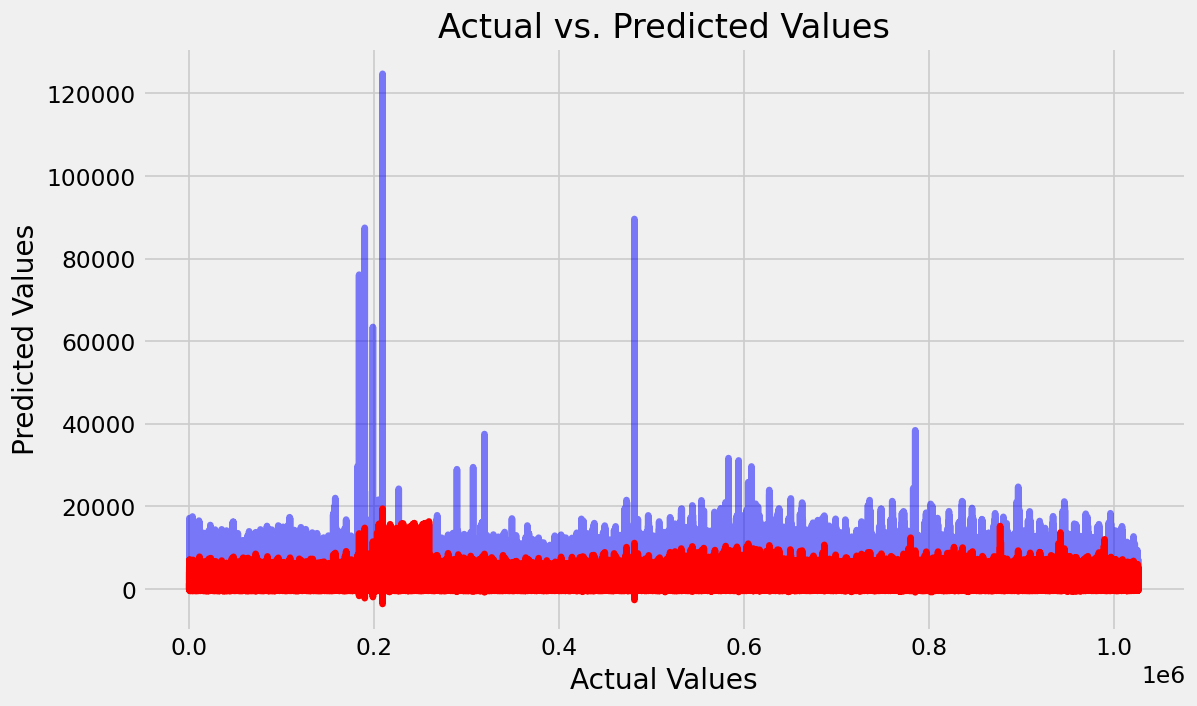

In [287]:
# ploting a line graph to visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_eval, color='blue', alpha=0.5)
plt.plot(y_pred,color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

#### 2. Decision Tree Model

In [288]:
# Creating an instance of the  decision tree model and fit it to the training data
decision_tree = DecisionTreeRegressor(random_state=0)
model_dtree = decision_tree.fit(X_train_scaled, y_train)

In [289]:
# Make predictions on the test data using the fitted model
tree_pred = model_dtree.predict(X_eval_scaled)
tree_pred

array([2.203977e+03, 1.500000e+01, 1.000000e+00, ..., 0.000000e+00,
       1.010000e+02, 1.809900e+02])

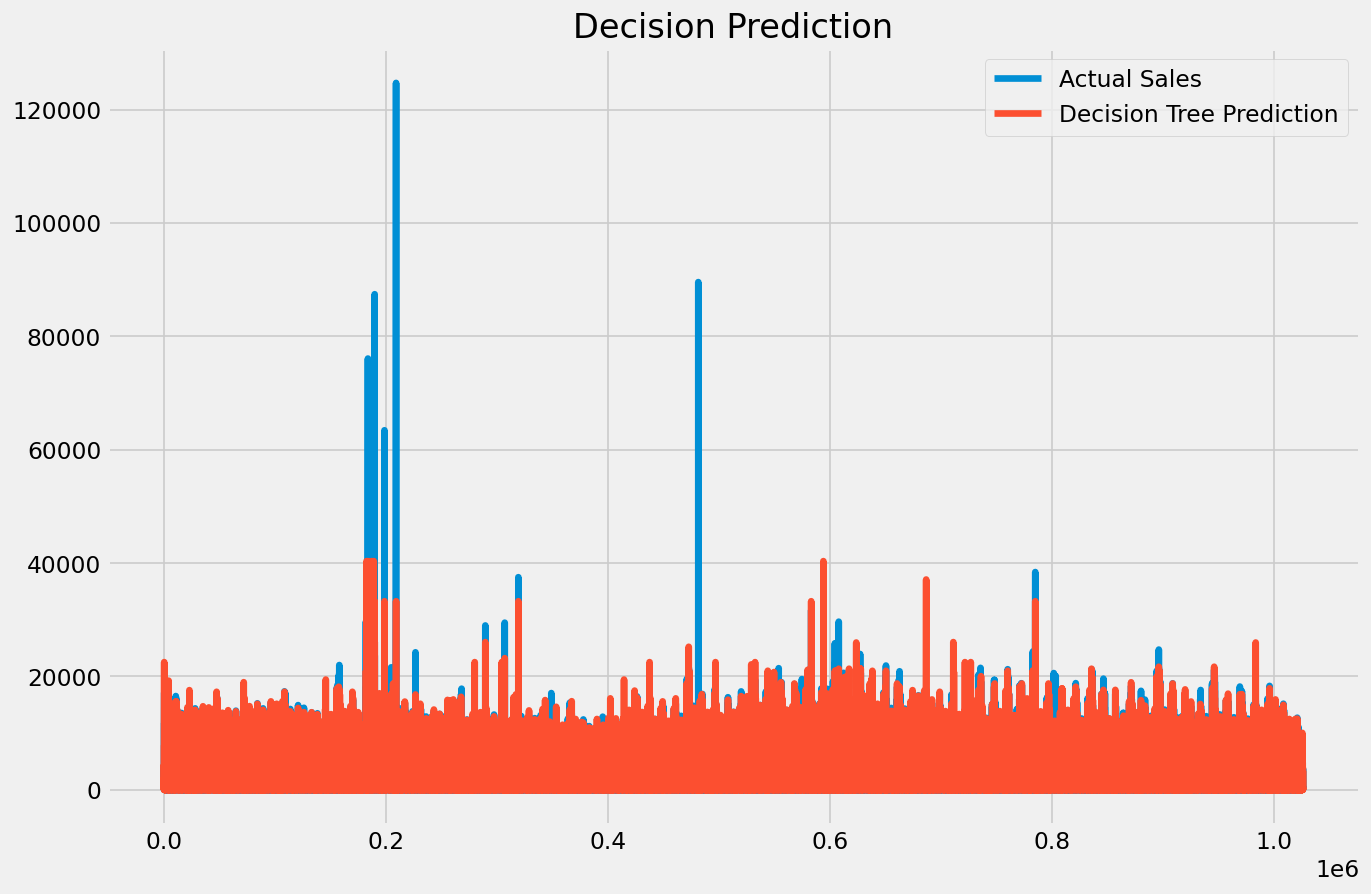

In [290]:
# ploting a line graph to visualize the actual vs. predicted values
plt.figure(figsize=(12,8))
plt.plot(y_eval, label ='Actual Sales')
plt.plot(tree_pred, label='Decision Tree Prediction')
plt.legend(loc='best')
plt.title('Decision Prediction')
plt.show()

#### 2. Random Forest Model

In [291]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

In [292]:
#fitting the model
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [294]:
#predicting the test data

y_pred = rf.predict(X_eval_scaled)


3. GradientBoostingRegressor

In [295]:
# Define the GBM model
gbm = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)


In [296]:
# Train the GBM model
gbm.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
#prediction
y_pred = gbm.predict(X_eval_scaled)
y_pred

array([42.20016776, 19.03456859, 29.310776  , ..., 29.45202285,
       35.51562152, 26.77605235])

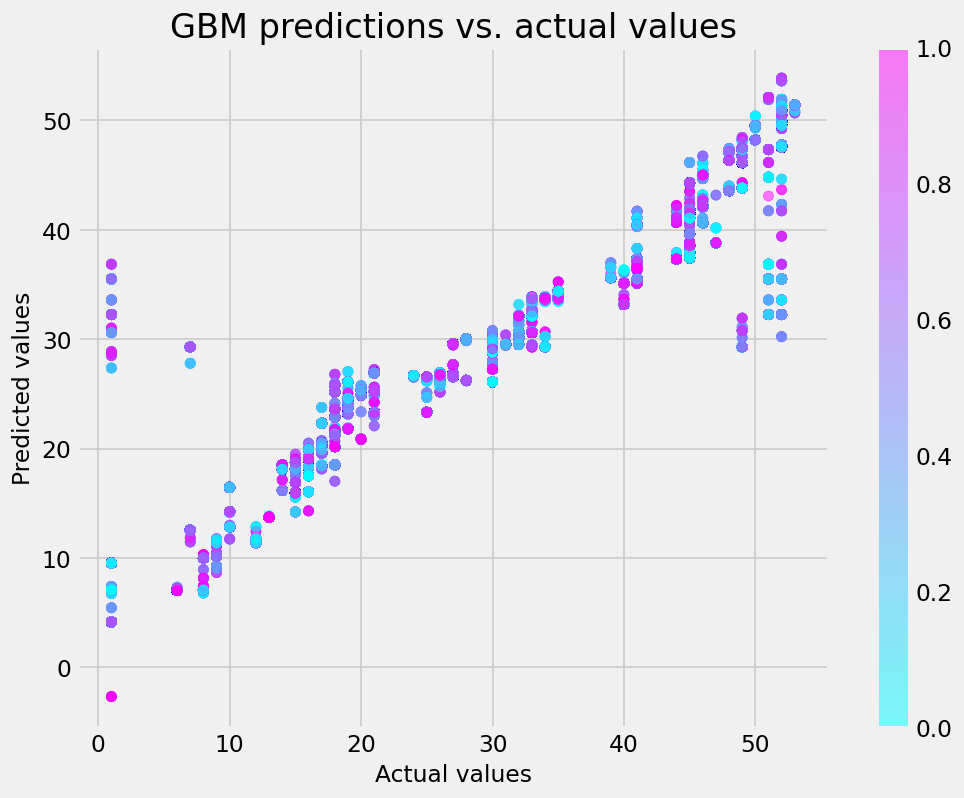

In [ ]:
# Create a boolean array that identifies actual values (True) and predicted values (False)
is_actual = np.ones(len(y_test), dtype=bool)
is_actual[::2] = False  # alternate True and False values

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred, c=is_actual, cmap='cool', alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('GBM predictions vs. actual values')
plt.colorbar()
plt.show()

### Evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

In [ ]:
Results = pd.DataFrame([['Gradient', mse,rmse,msle,rmsle]], columns= ['model', 'MSE','RMSE', 'MSLE', 'RMSLE'])
Results

,model,MSE,RMSE,MSLE,RMSLE
0,Gradient,21.923405,4.682244,0.125434,0.354167


### Evaluation meterics for the three models 

In [ ]:


data = {
    'MSE': [20.351318, 44.523429, 177.217831],
    'RMSE': [4.511243, 6.672588, 13.312319],
    'MSLE': [0.117473, 0.117473, 0.351781],
    'RMSLE': [0.289249, 0.382648, 0.593111]
}

index = ['Gradient', 'Random', 'Linear']

metrics = pd.DataFrame(data=data, index=index)

print(metrics)


                 MSE       RMSE      MSLE     RMSLE
Gradient   20.351318   4.511243  0.117473  0.289249
Random     44.523429   6.672588  0.117473  0.382648
Linear    177.217831  13.312319  0.351781  0.593111


The best working model is Gradient Boosting Regressor

### Save selected model

In [ ]:
# Load the trained model from disk
loaded_model = joblib.load('Completed_model.joblib')

# Make predictions on the test data
y_pred = loaded_model.predict(X_test)

# Create a DataFrame with the predictions and export to CSV
results = pd.DataFrame({'y_pred': y_pred})
results.to_csv('final_submission.csv', index=False)
